In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [3]:
credit = pd.read_csv('credit_data_risk.csv')

In [4]:
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
del credit['Unnamed: 0']

In [6]:
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (10,6)

In [8]:
numerical_credit = credit.select_dtypes(exclude='O')

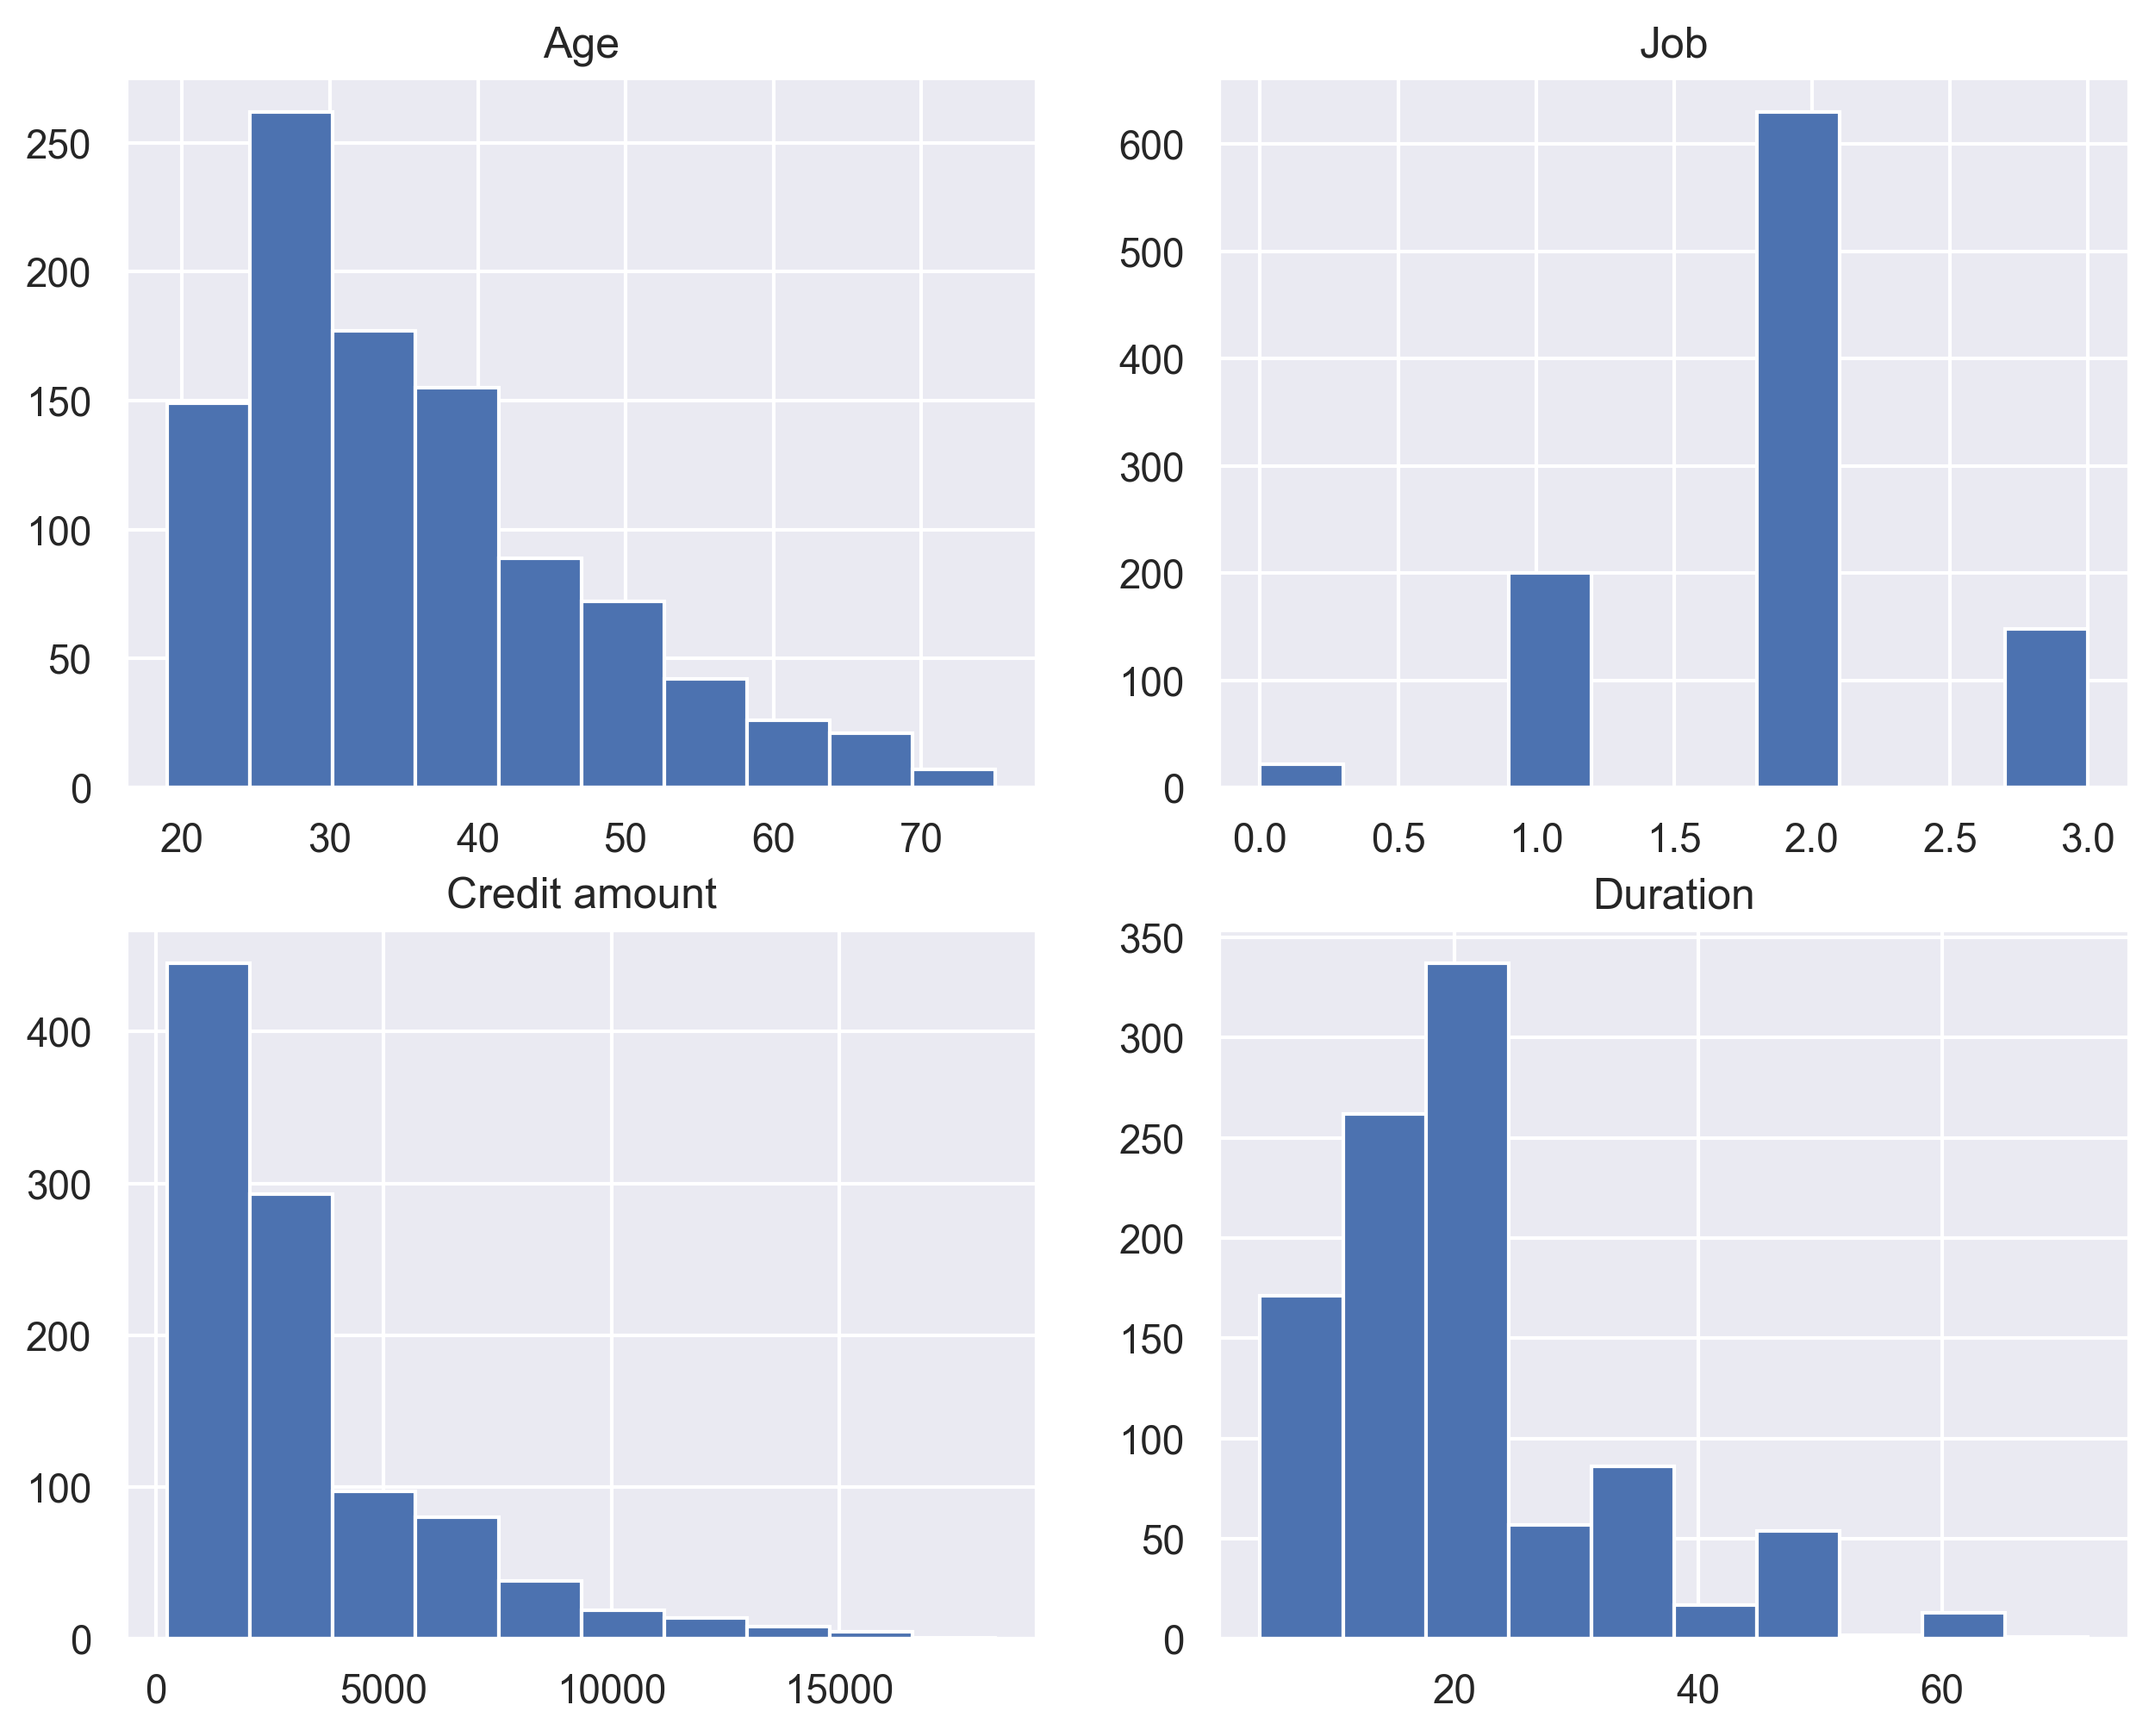

In [9]:
plt.figure(figsize=(10, 8))
k = 0
cols = numerical_credit.columns
for i, j in zip(range(len(cols)), cols):
    k +=1
    plt.subplot(2, 2, k)
    plt.hist(numerical_credit.iloc[:, i])
    plt.title(j)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [11]:
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

In [12]:
distance = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_credit)
    distance.append(kmeans.inertia_)

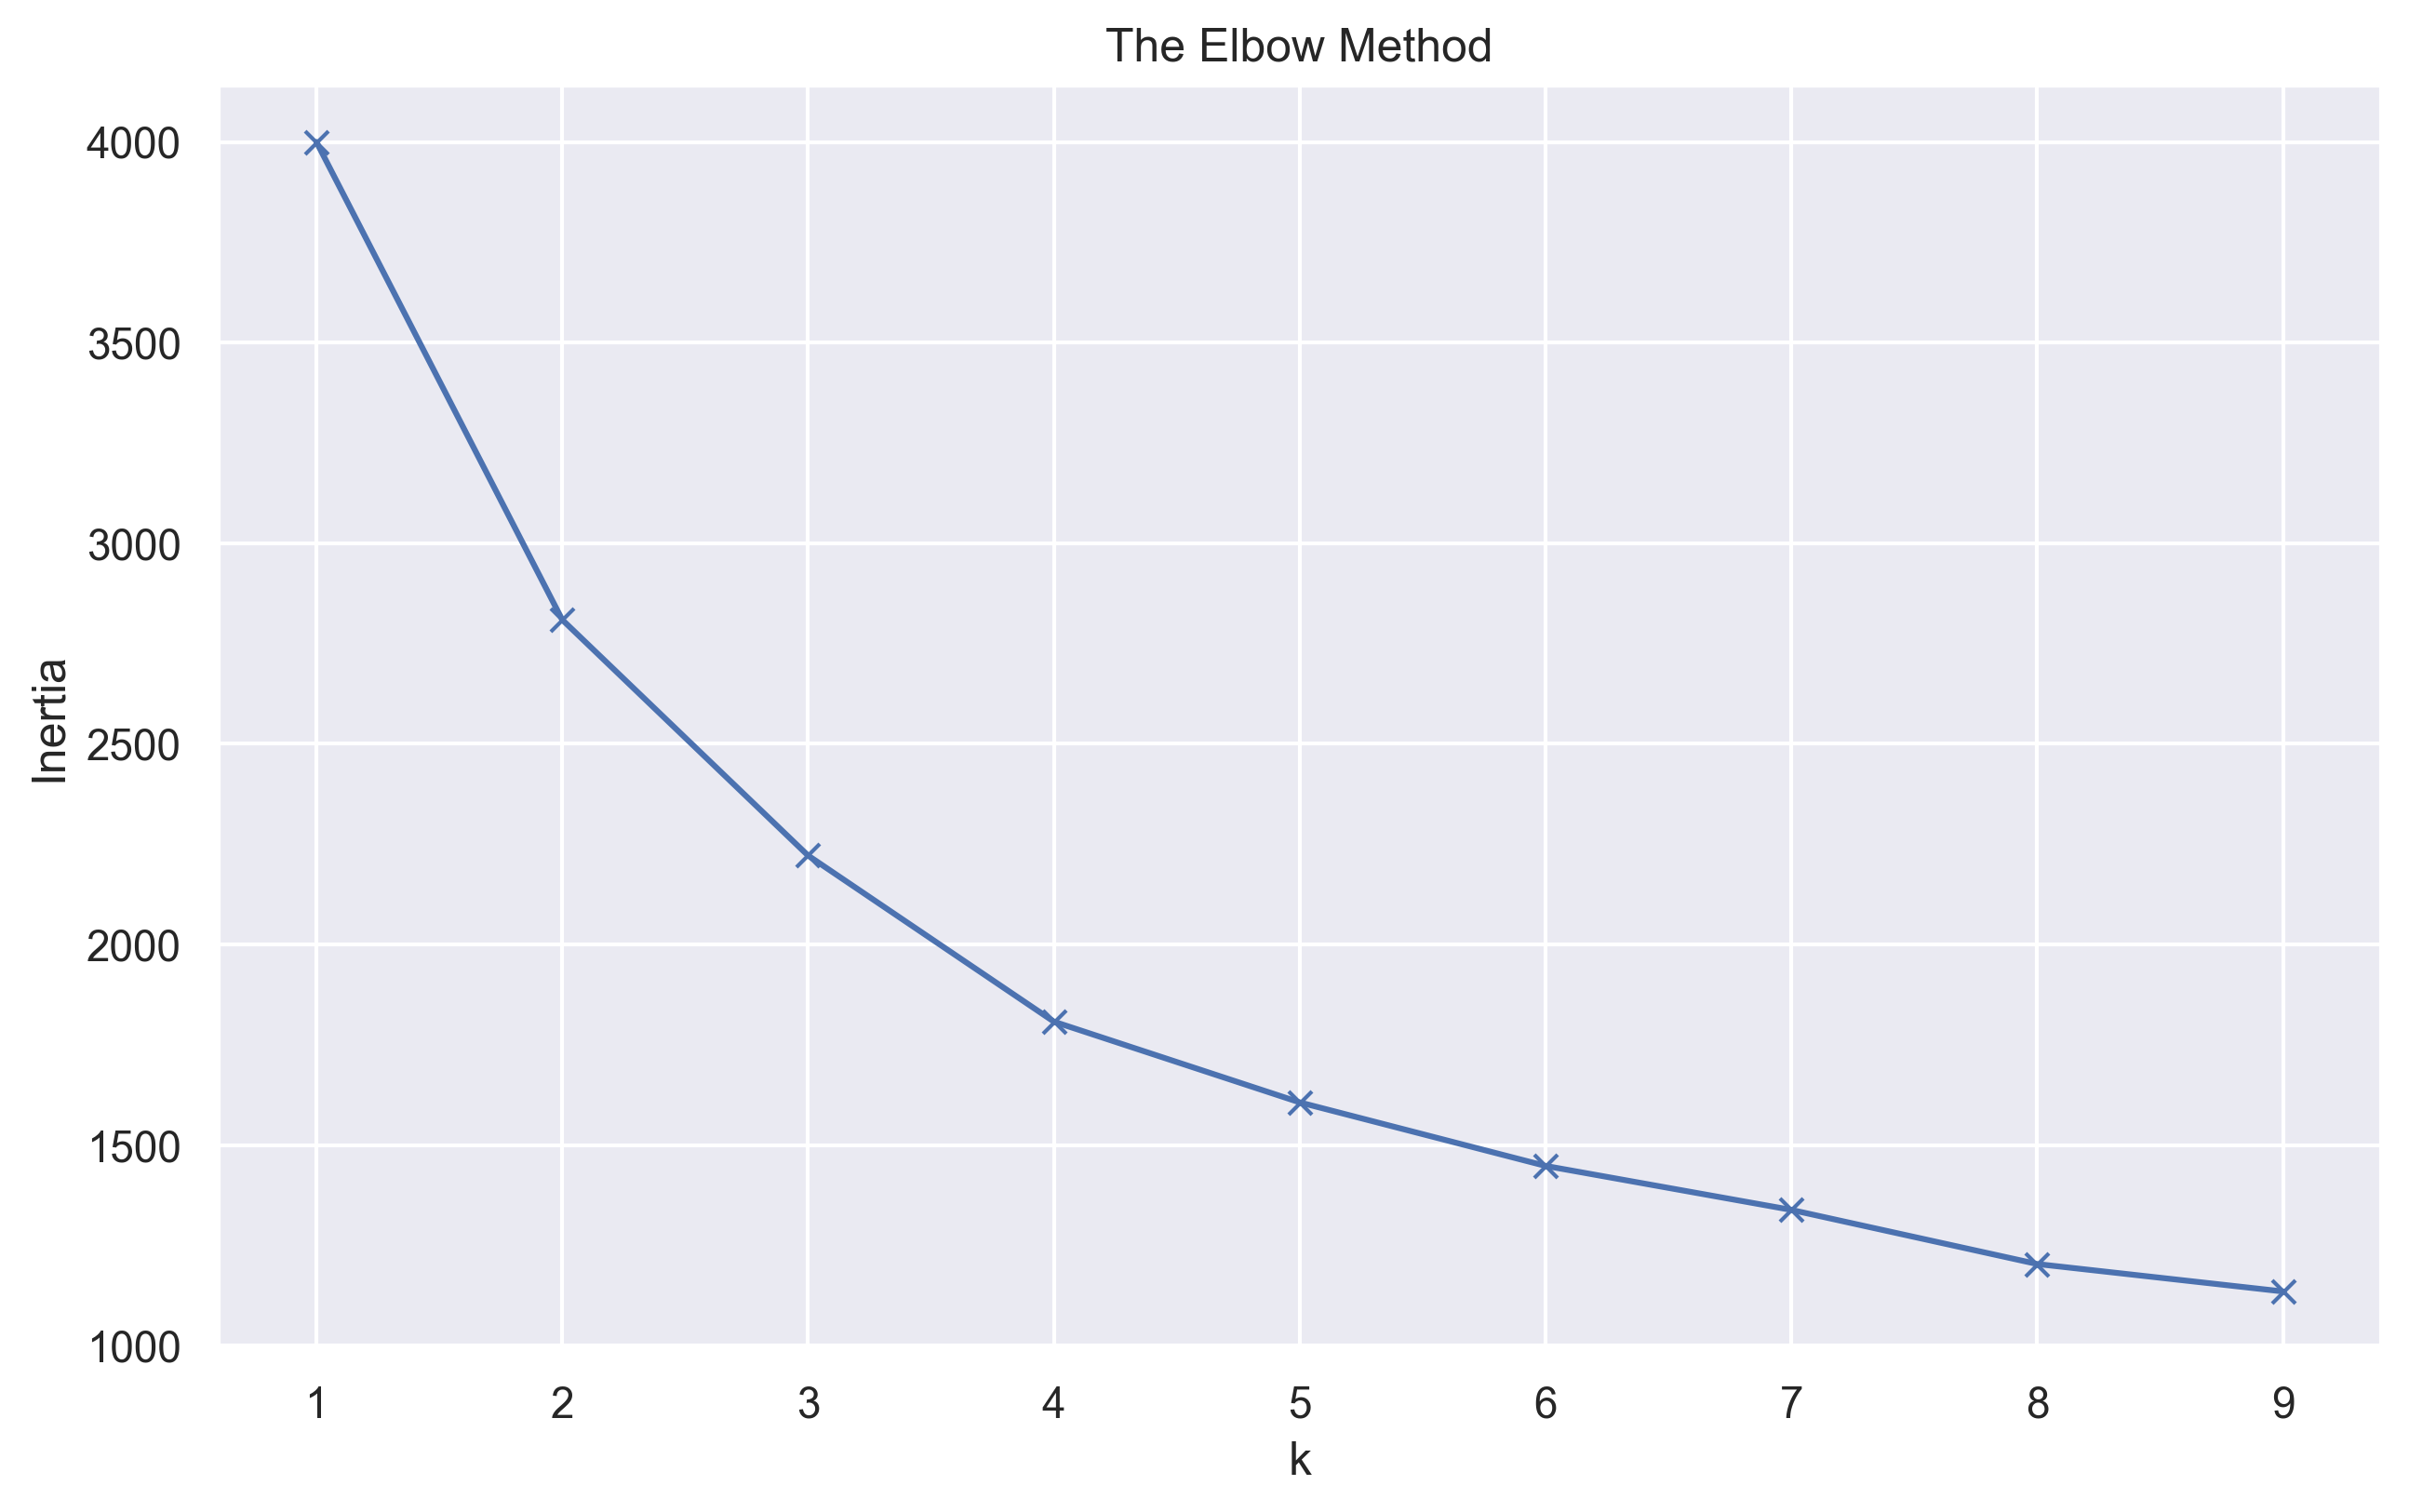

In [13]:
plt.plot(range(1, 10), distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

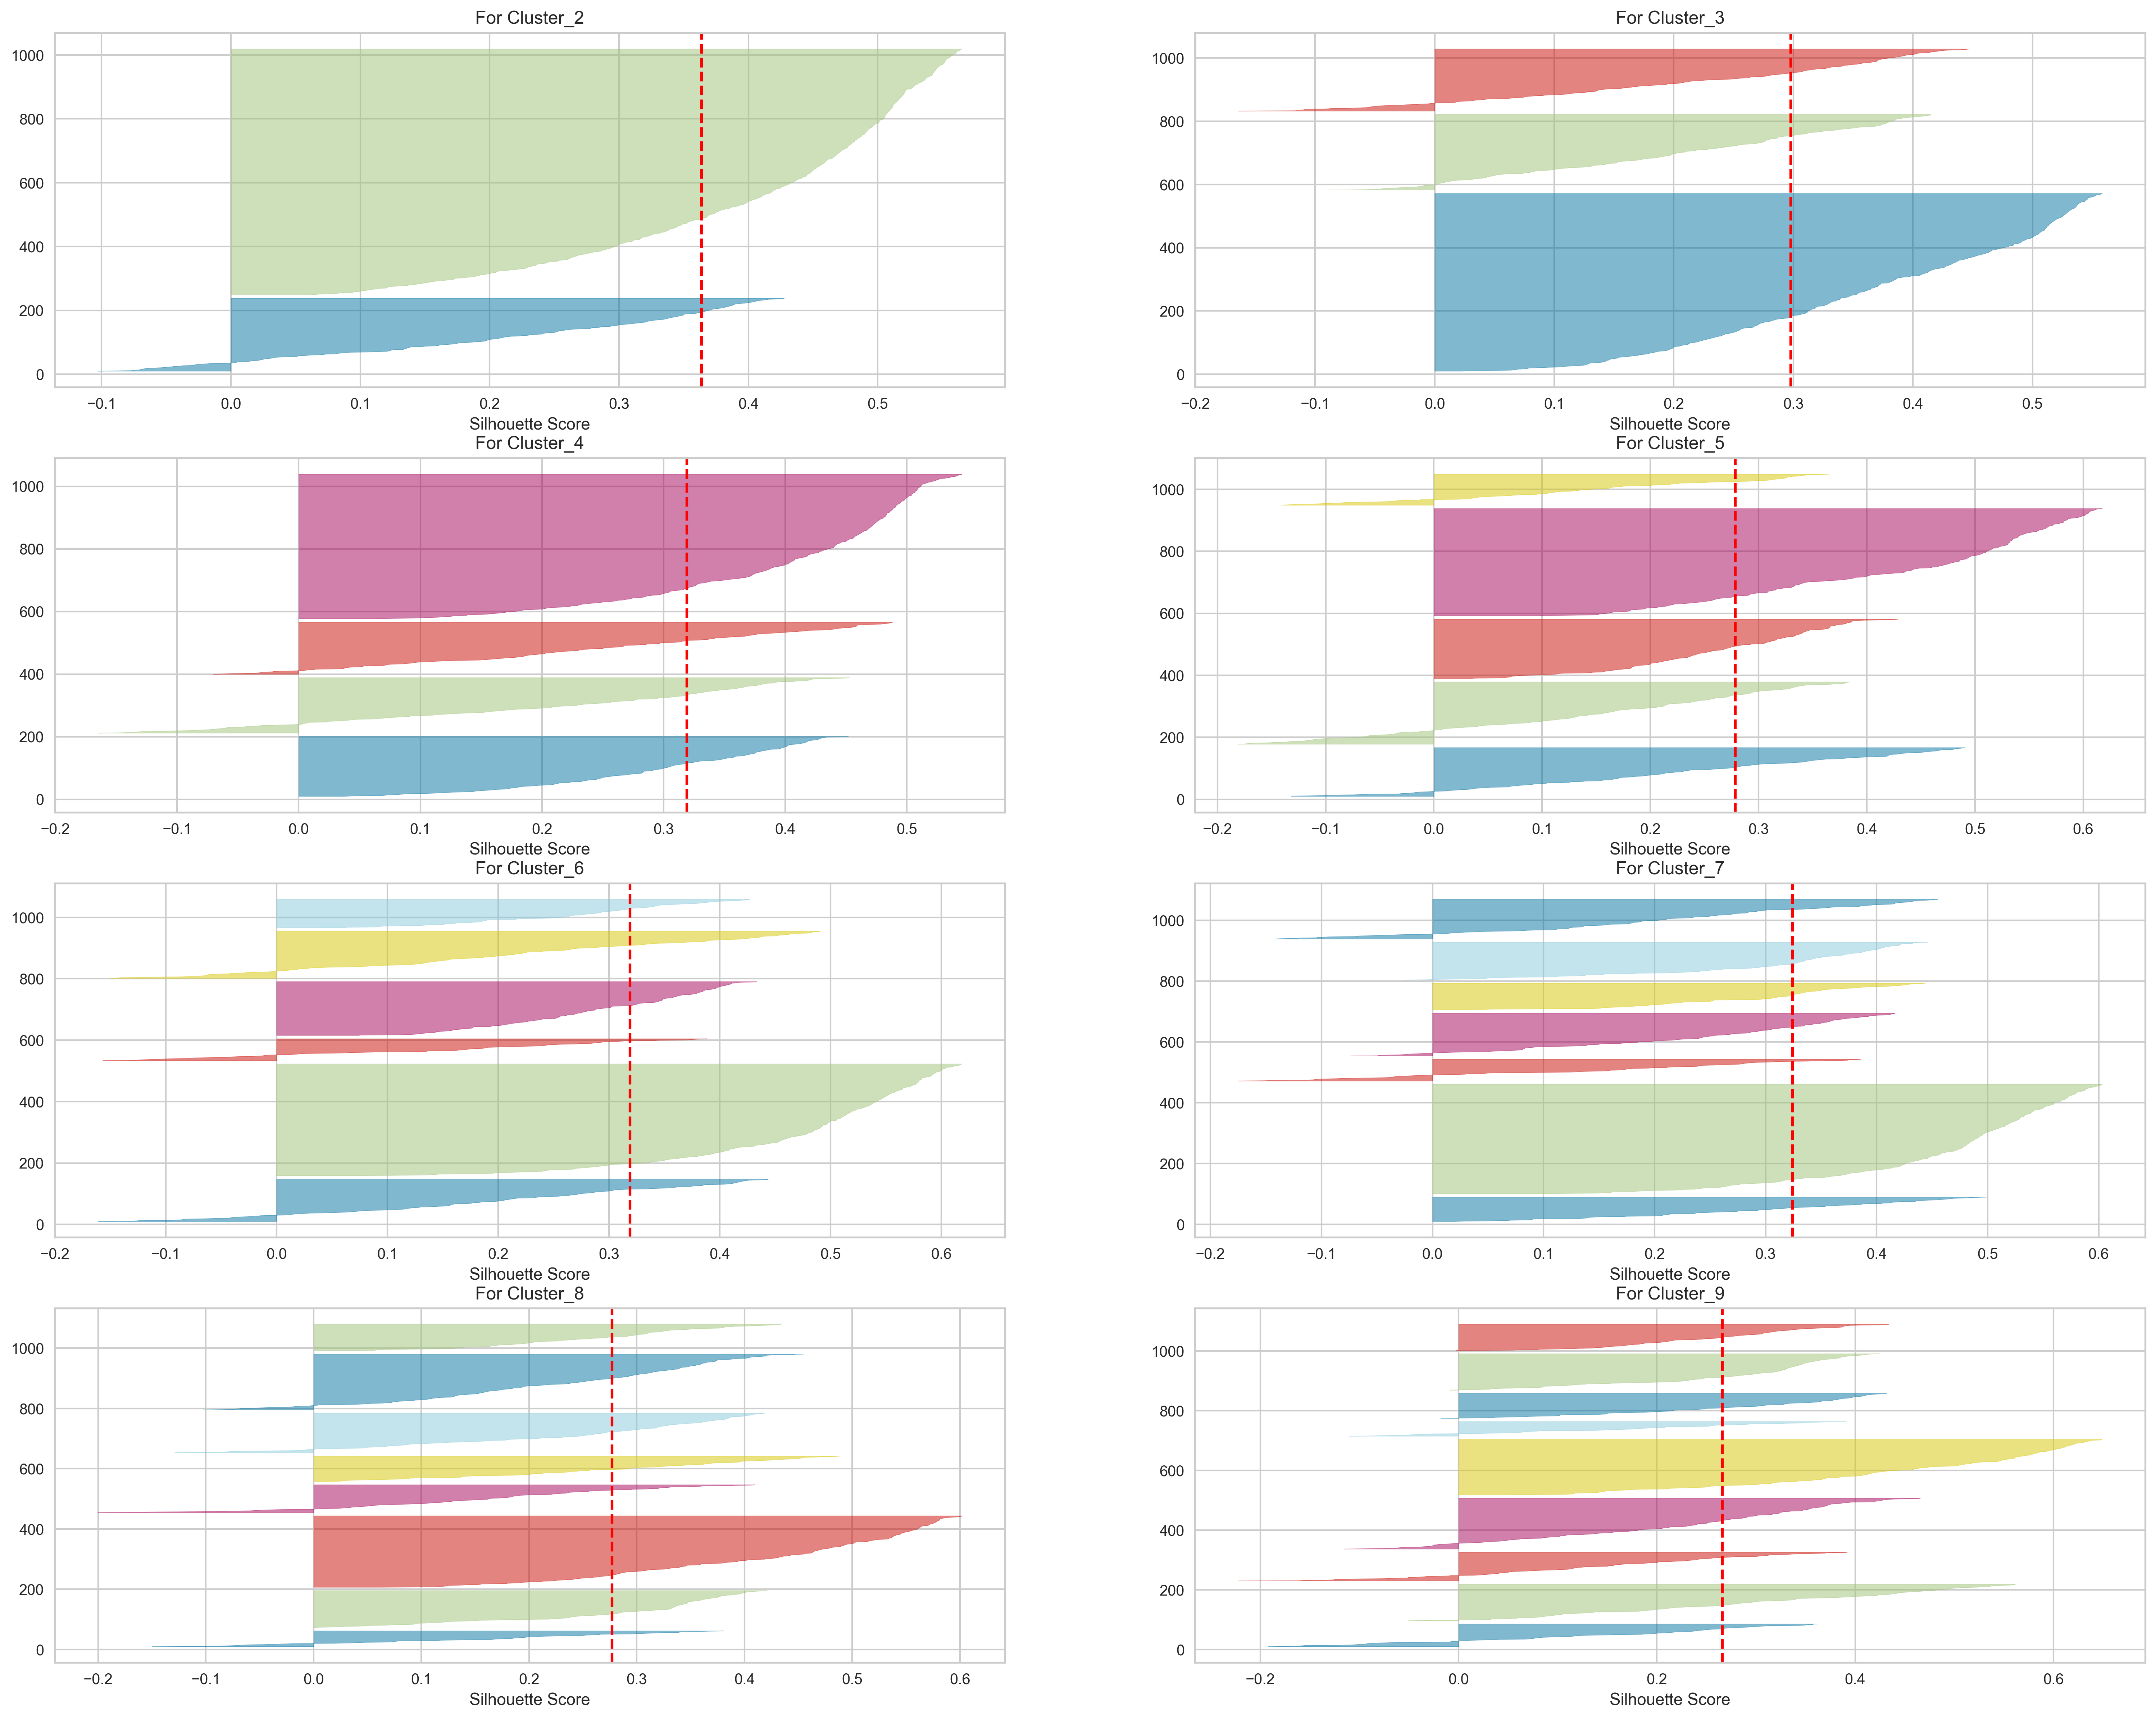

In [15]:
fig, ax = plt.subplots(4, 2, figsize=(25, 20))
for i in range(2, 10):
    km = KMeans(n_clusters=i)
    q, r = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick',
                                      ax=ax[q - 1][r])
    visualizer.fit(scaled_credit)
    ax[q - 1][r].set_title("For Cluster_"+str(i))
    ax[q - 1][r].set_xlabel("Silhouette Score")

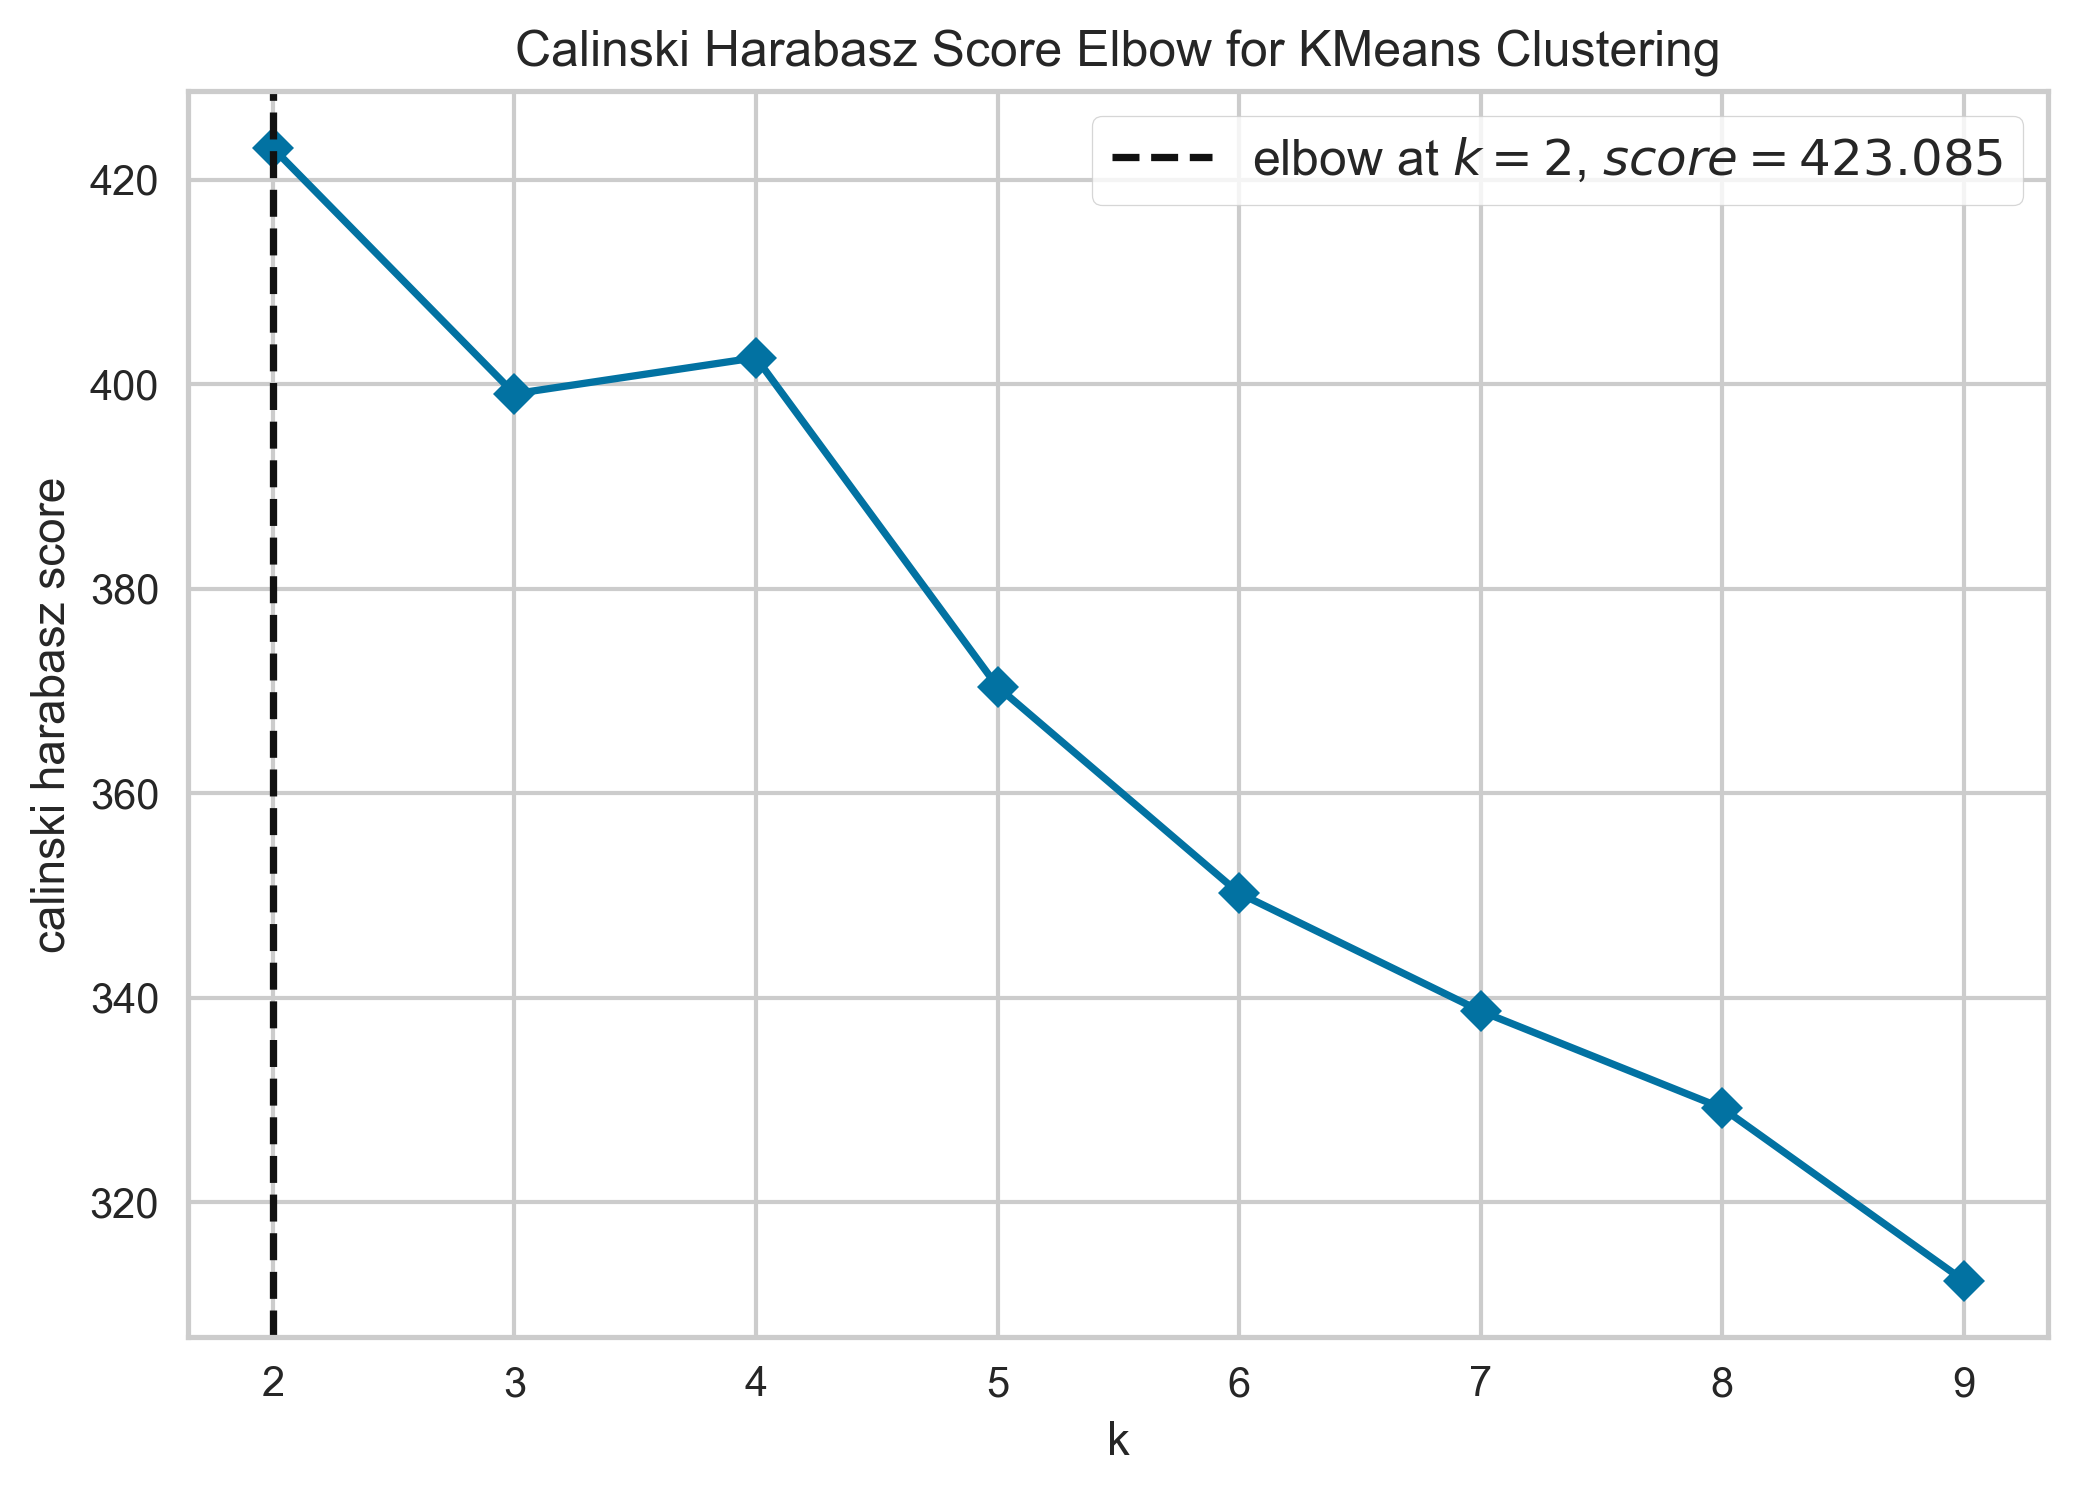

In [16]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 10),
                              metric='calinski_harabasz',
                              timings=False)
visualizer.fit(scaled_credit)
visualizer.show();

In [17]:
from gap_statistic.optimalK import OptimalK

In [18]:
optimalK = OptimalK(n_jobs=8, parallel_backend='joblib')
n_clusters = optimalK(scaled_credit, cluster_array=np.arange(1, 10))

C:\Users\Aditya Vikram\AppData\Local\Programs\Python\Python310\lib\site-packages\gap_statistic\optimalK.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gap_df = gap_df.append(
C:\Users\Aditya Vikram\AppData\Local\Programs\Python\Python310\lib\site-packages\gap_statistic\optimalK.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gap_df = gap_df.append(
C:\Users\Aditya Vikram\AppData\Local\Programs\Python\Python310\lib\site-packages\gap_statistic\optimalK.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gap_df = gap_df.append(
C:\Users\Aditya Vikram\AppData\Local\Programs\Python\Python310\lib\site-packages\gap_statistic\optimalK.py:137: FutureWarning: The frame.append method is deprecated and will be removed fr

In [19]:
gap_result = optimalK.gap_df
gap_result.head()

,n_clusters,gap_value,gap*,ref_dispersion_std,sk,sk*,diff,diff*
0,1.0,0.888164,5722.734878,39.556714,0.004694,6608.202905,-0.074940,6502.979629
1,2.0,1.014761,4954.587575,343.930684,0.051657,5734.832326,0.022304,5553.665931
2,3.0,1.007944,3866.042945,81.811493,0.015487,4465.121300,-0.063826,4434.559724
3,4.0,1.103388,3651.826886,150.452271,0.031618,4220.343666,0.100916,4148.276696
4,5.0,1.022720,3200.209297,87.331939,0.020248,3696.659107,0.047231,3621.630466


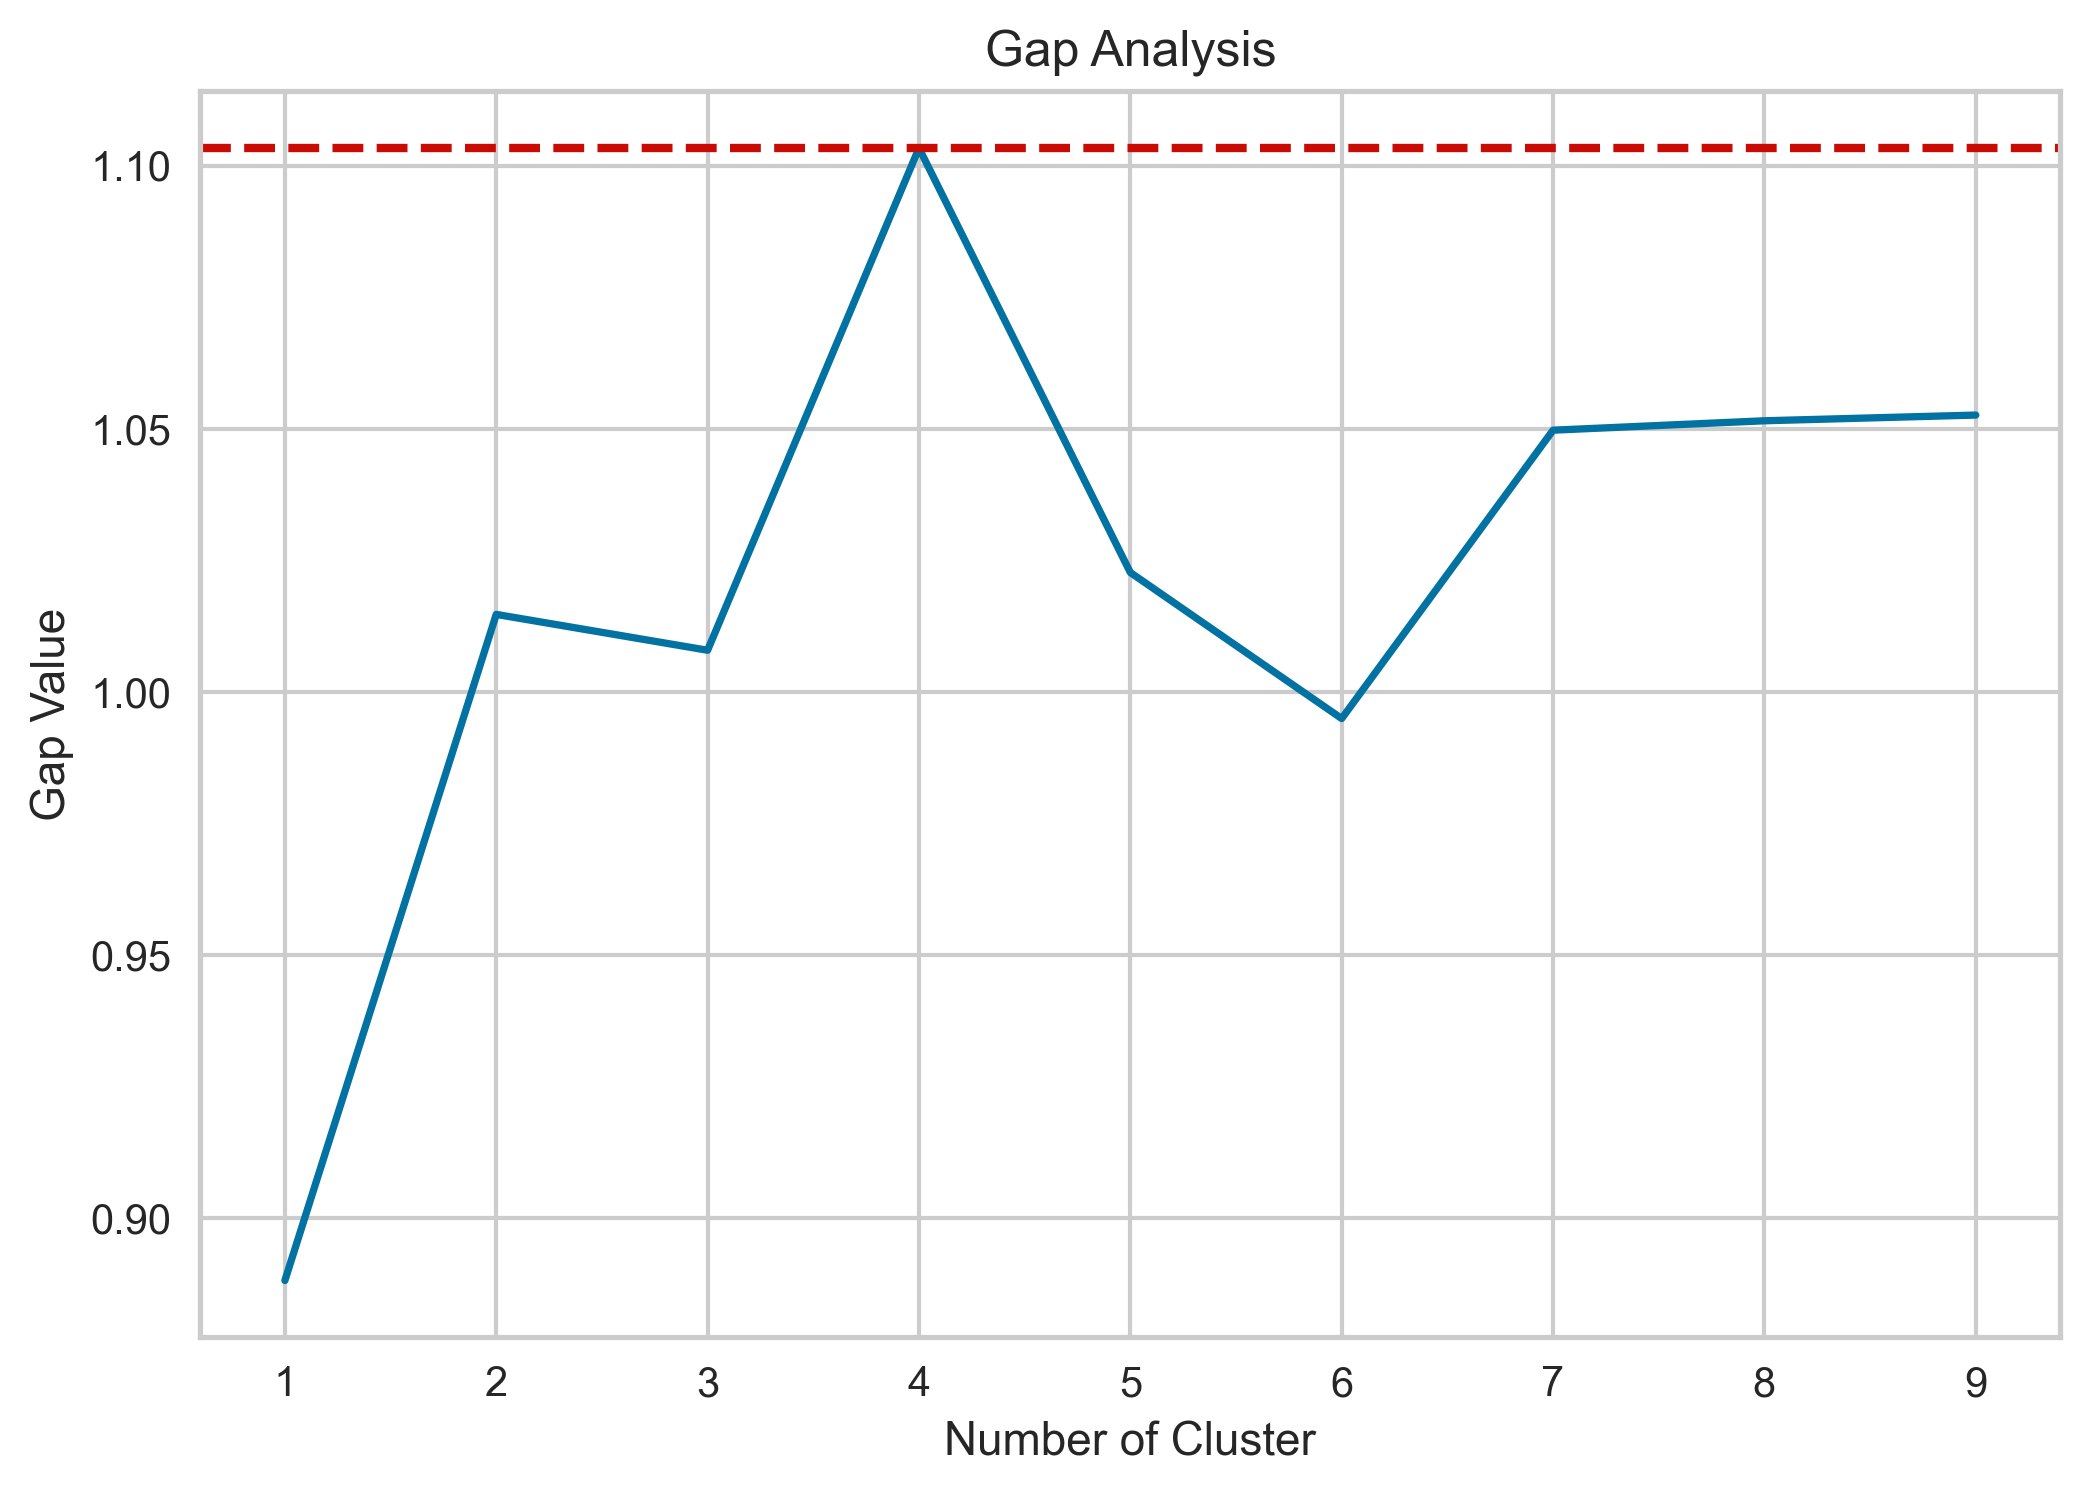

In [20]:
plt.plot(gap_result.n_clusters, gap_result.gap_value)
min_ylim, max_ylim = plt.ylim()
plt.axhline(np.max(gap_result.gap_value), color='r',
            linestyle='dashed', linewidth=2)
plt.title('Gap Analysis')
plt.xlabel('Number of Cluster')
plt.ylabel('Gap Value')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(scaled_credit)

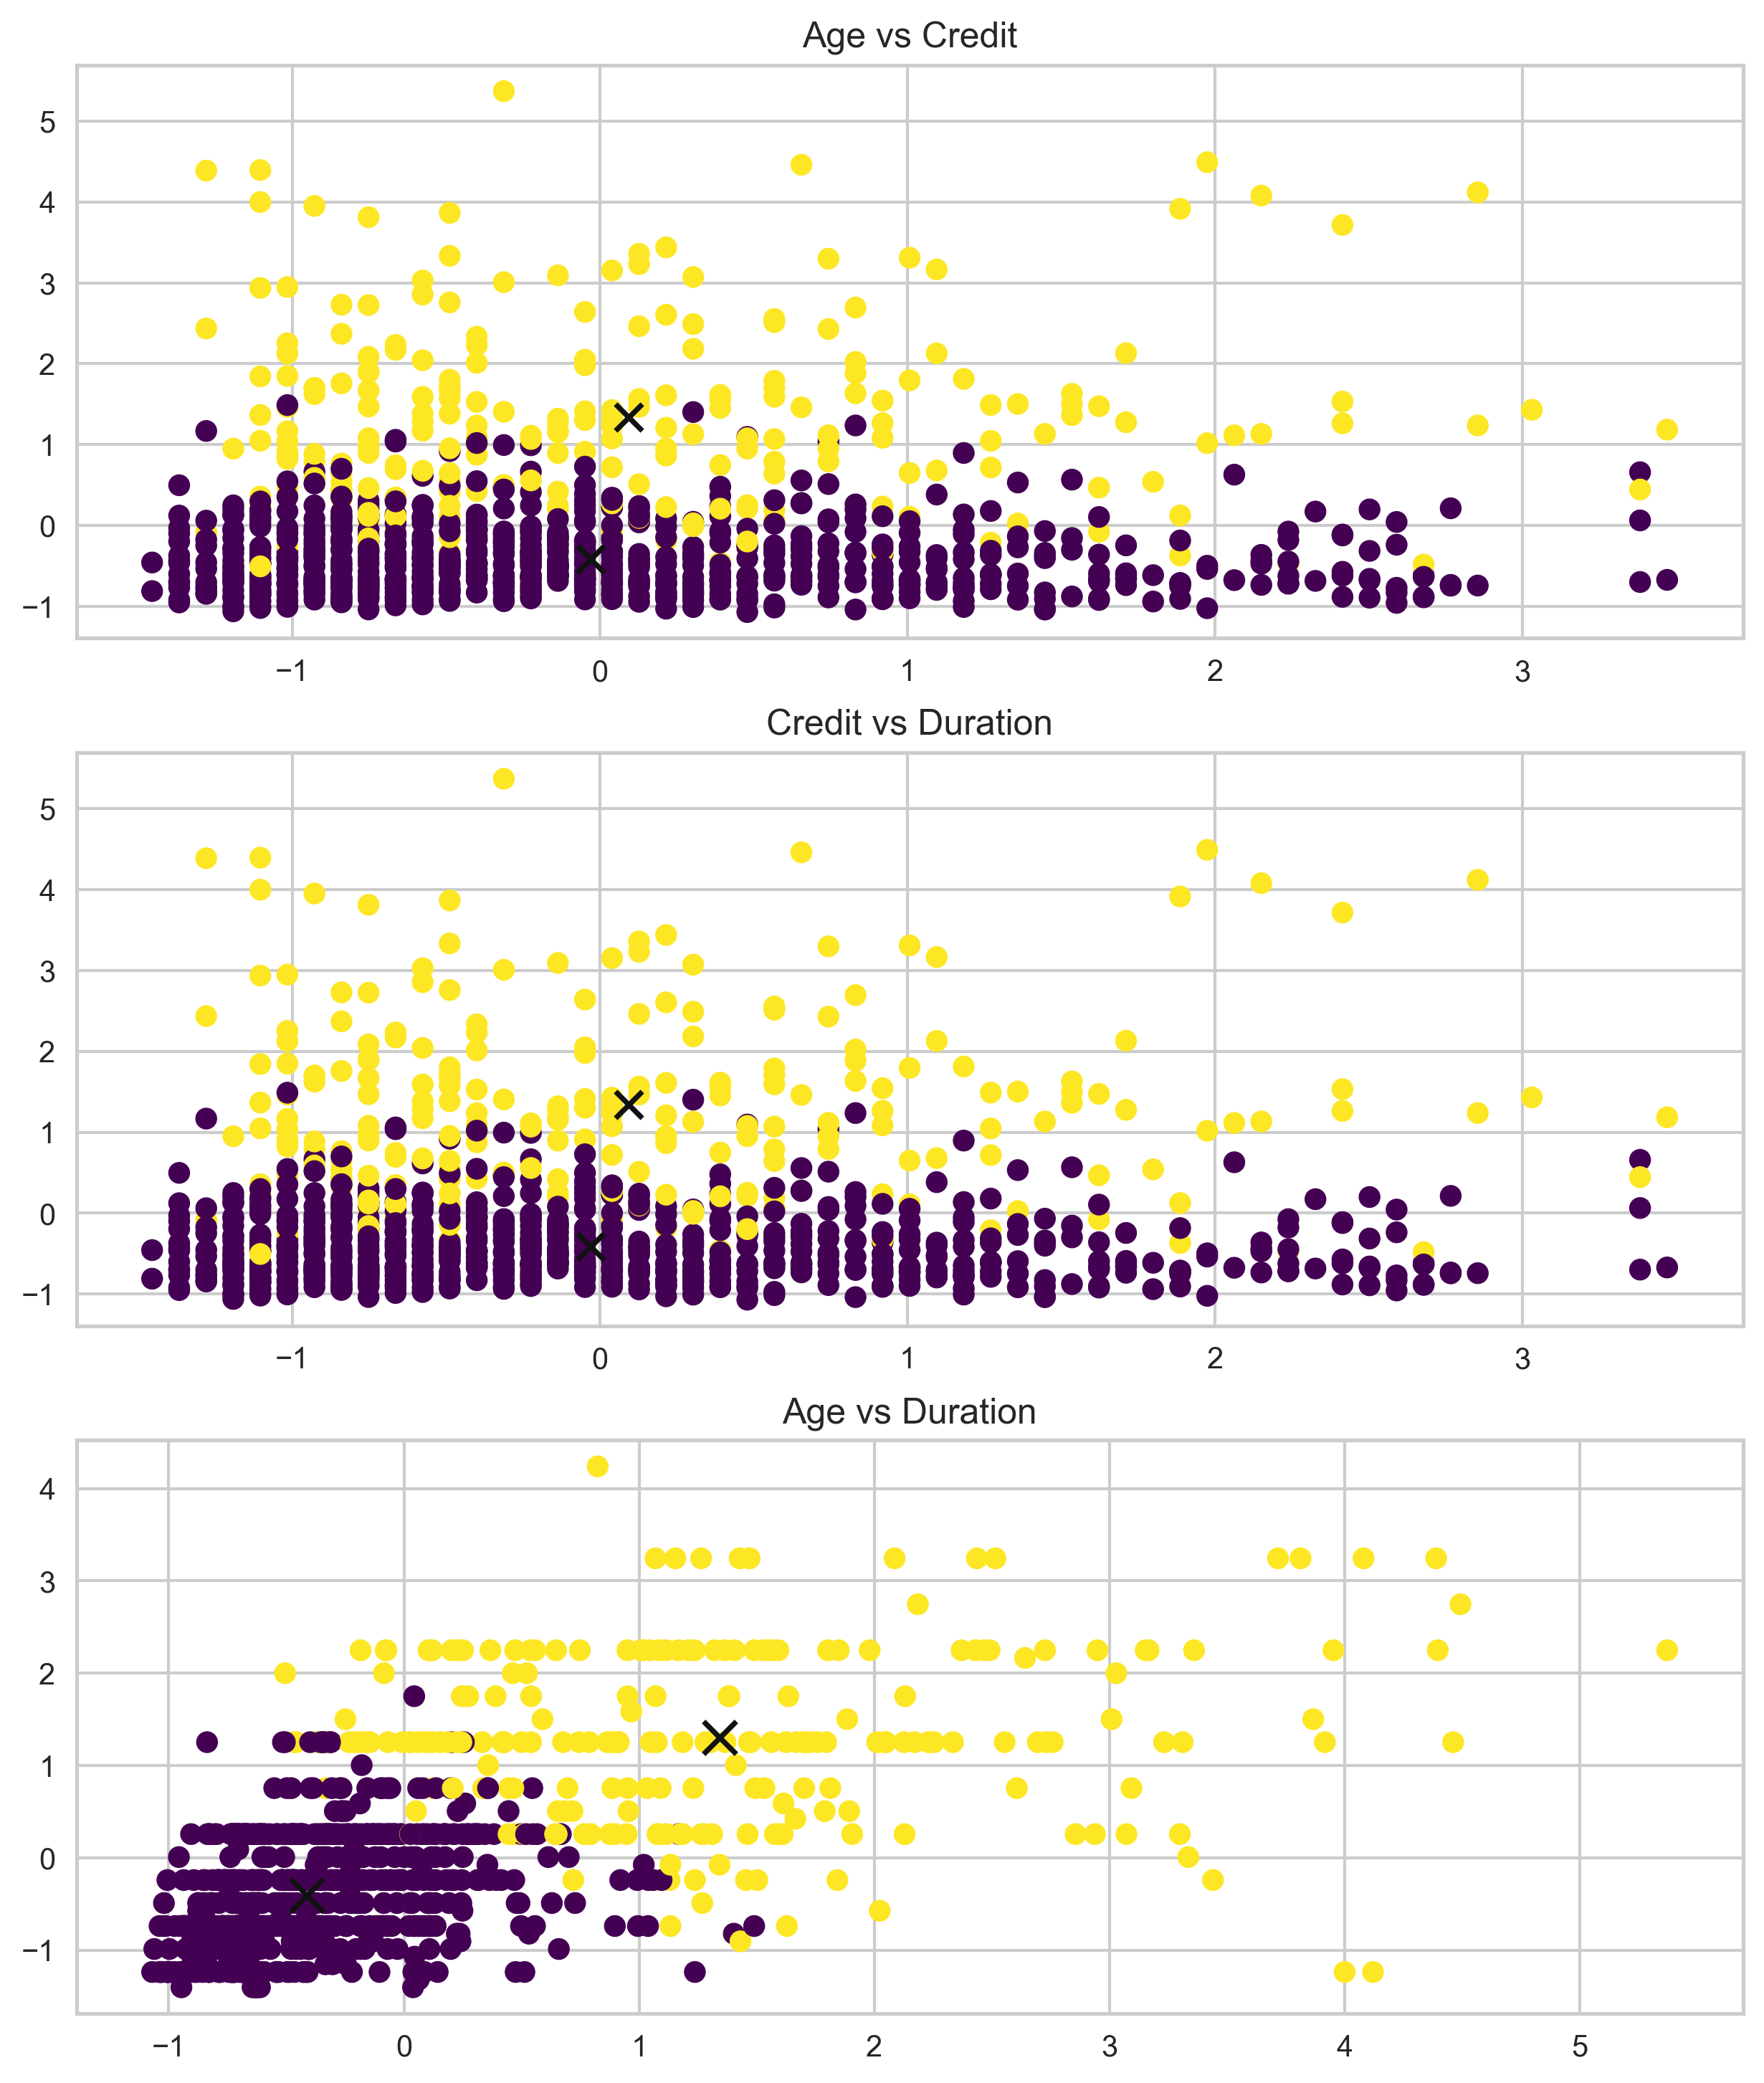

In [22]:
plt.figure(figsize=(10, 12))
plt.subplot(311)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2],
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 2], s = 80,
            marker= 'x', color = 'k')
plt.title('Age vs Credit')
plt.subplot(312)
plt.scatter(scaled_credit[:, 0], scaled_credit[:, 2],
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 2], s = 80,
            marker= 'x', color = 'k')
plt.title('Credit vs Duration')
plt.subplot(313)
plt.scatter(scaled_credit[:, 2], scaled_credit[:, 3],
            c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 2],
            kmeans.cluster_centers_[:, 3], s = 120,
            marker= 'x', color = 'k')
plt.title('Age vs Duration')
plt.show()

In [23]:
clusters, counts = np.unique(kmeans.labels_, return_counts=True)

In [24]:
cluster_dict = {}
for i in range(len(clusters)):
    cluster_dict[i] = scaled_credit[np.where(kmeans.labels_==i)]

In [25]:
credit['clusters'] = pd.DataFrame(kmeans.labels_)

In [26]:
df_scaled = pd.DataFrame(scaled_credit)
df_scaled['clusters'] = credit['clusters']

In [27]:
df_scaled['Risk'] = credit['Risk']
df_scaled.columns = ['Age', 'Job', 'Credit amount',
                     'Duration', 'Clusters', 'Risk']

In [28]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts()

good    571
bad     193
Name: Risk, dtype: int64

In [29]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts()

good    129
bad     107
Name: Risk, dtype: int64

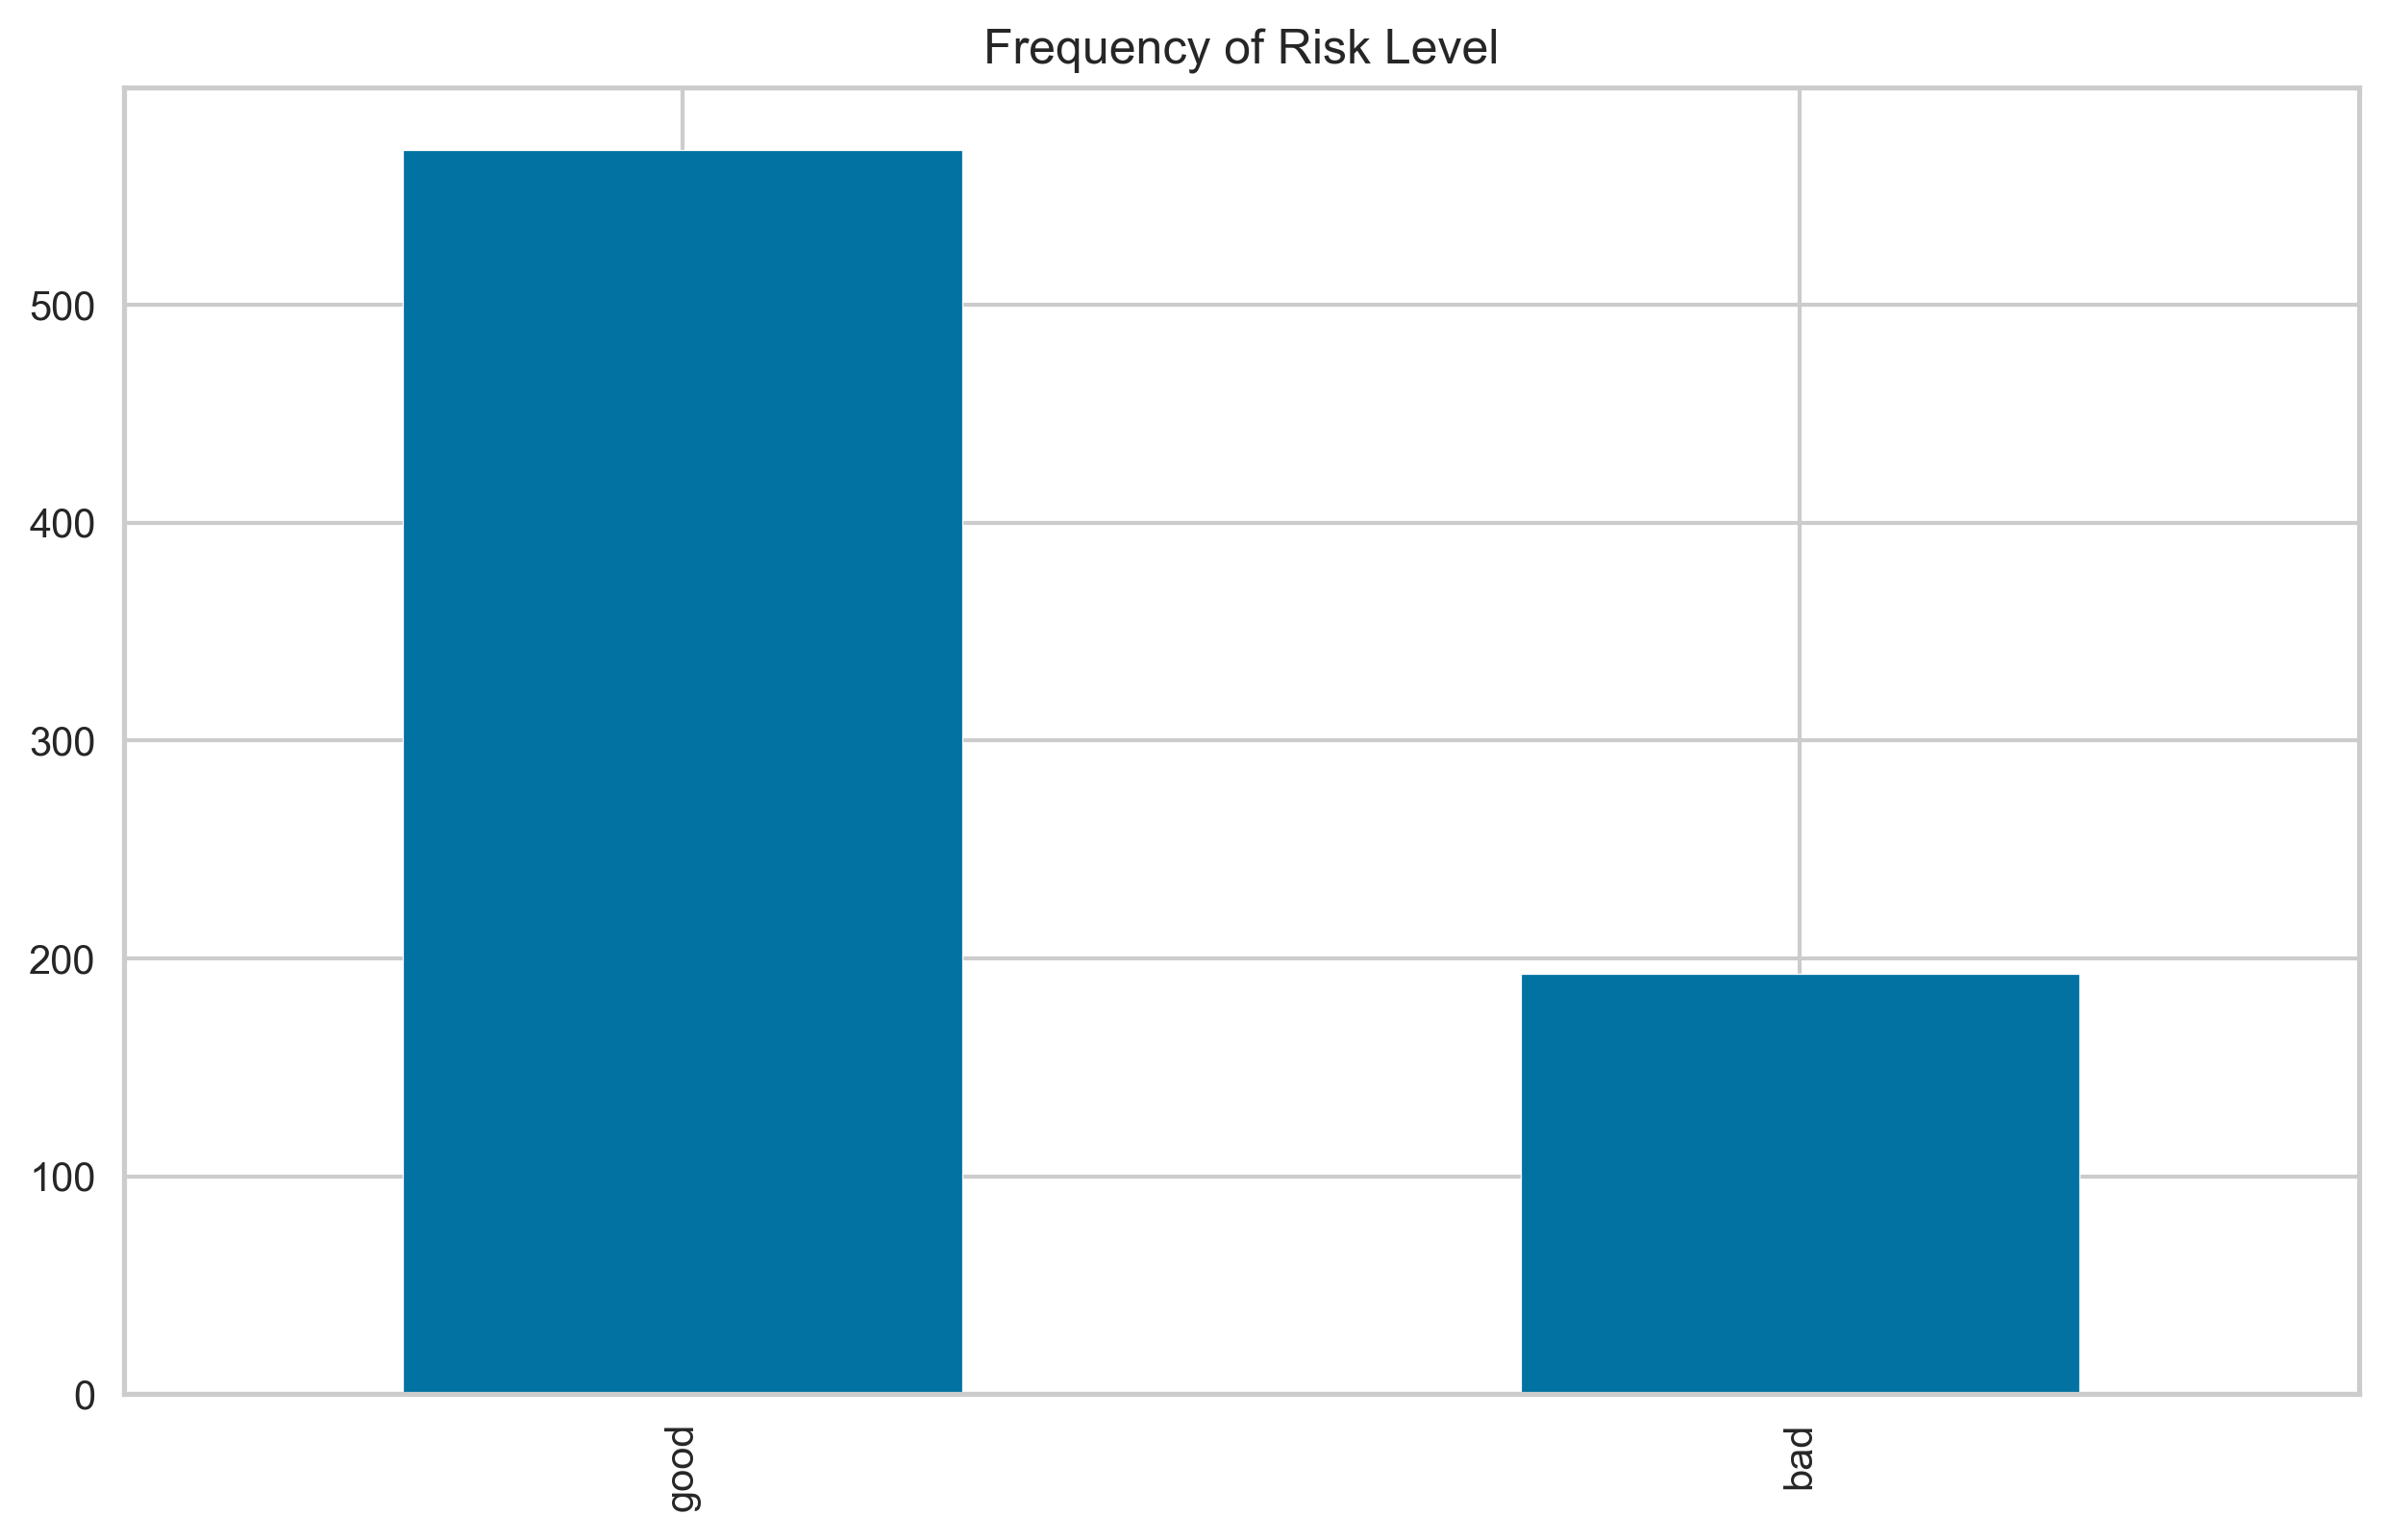

In [30]:
df_scaled[df_scaled.Clusters == 0]['Risk'].value_counts()\
                                    .plot(kind='bar',
                                    figsize=(10, 6),
                                    title="Frequency of Risk Level")
plt.show()

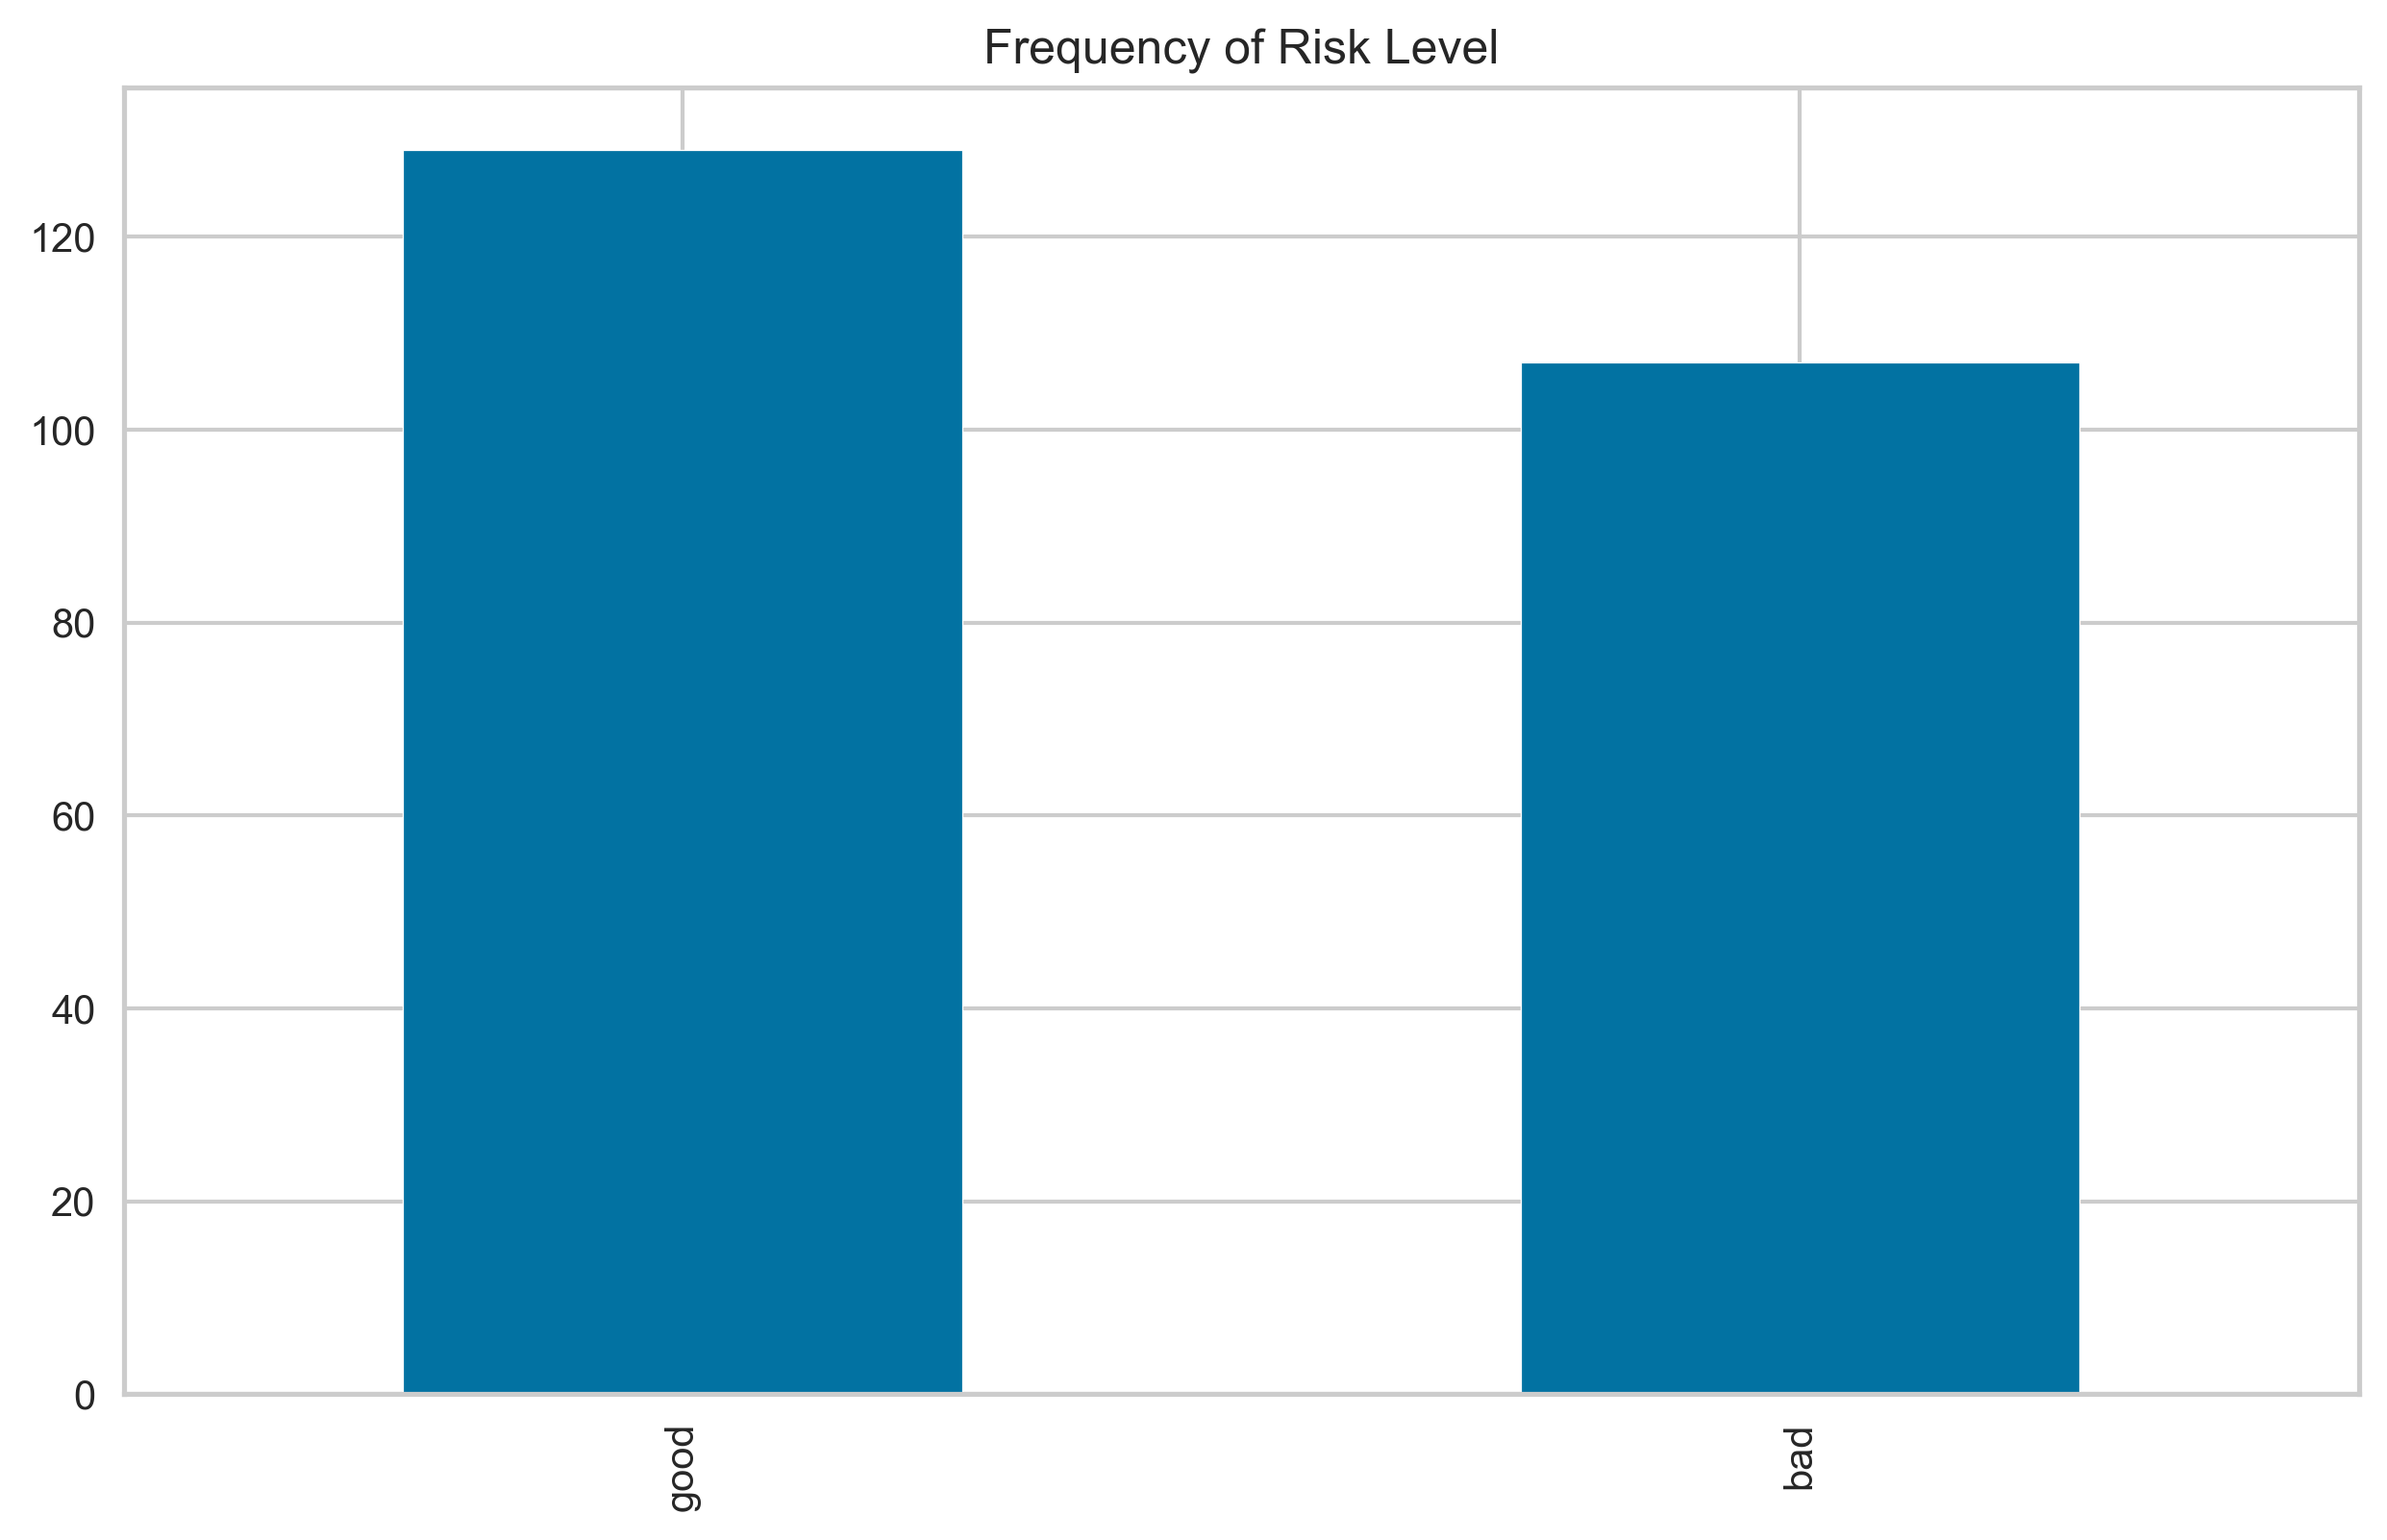

In [31]:
df_scaled[df_scaled.Clusters == 1]['Risk'].value_counts()\
                                    .plot(kind='bar',
                                    figsize=(10, 6),
                                    title="Frequency of Risk Level")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
df_scaled['Risk'] = df_scaled['Risk'].replace({'good': 1, 'bad': 0})

In [34]:
X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:, ['Risk', 'Clusters']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [36]:
first_cluster_train = X_train[X_train.Clusters == 0].iloc[:, :-1]
second_cluster_train = X_train[X_train.Clusters == 1].iloc[:, :-1]

## Logistic Regression for PD Estimation

In [37]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')

In [38]:
X_train1 = first_cluster_train
y_train1 = y_train[y_train.Clusters == 0]['Risk']
smote = SMOTEENN(random_state = 2)
X_train1, y_train1 = smote.fit_resample(X_train1, y_train1.ravel())
logit = sm.Logit(y_train1, X_train1)
logit_fit1 = logit.fit()
print(logit_fit1.summary())

Optimization terminated successfully.
         Current function value: 0.479511
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  370
Model:                          Logit   Df Residuals:                      366
Method:                           MLE   Df Model:                            3
Date:                Tue, 05 Jul 2022   Pseudo R-squ.:                  0.2989
Time:                        20:26:16   Log-Likelihood:                -177.42
converged:                       True   LL-Null:                       -253.08
Covariance Type:            nonrobust   LLR p-value:                 1.372e-32
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               1.3677      0.164      8.348      0.000       1.047       1.689
Job               0.

In [39]:
first_cluster_test = X_test[X_test.Clusters == 0].iloc[:, :-1]
second_cluster_test = X_test[X_test.Clusters == 1].iloc[:, :-1]

In [40]:
X_test1 = first_cluster_test
y_test1 = y_test[y_test.Clusters == 0]['Risk']
pred_prob1 = logit_fit1.predict(X_test1)

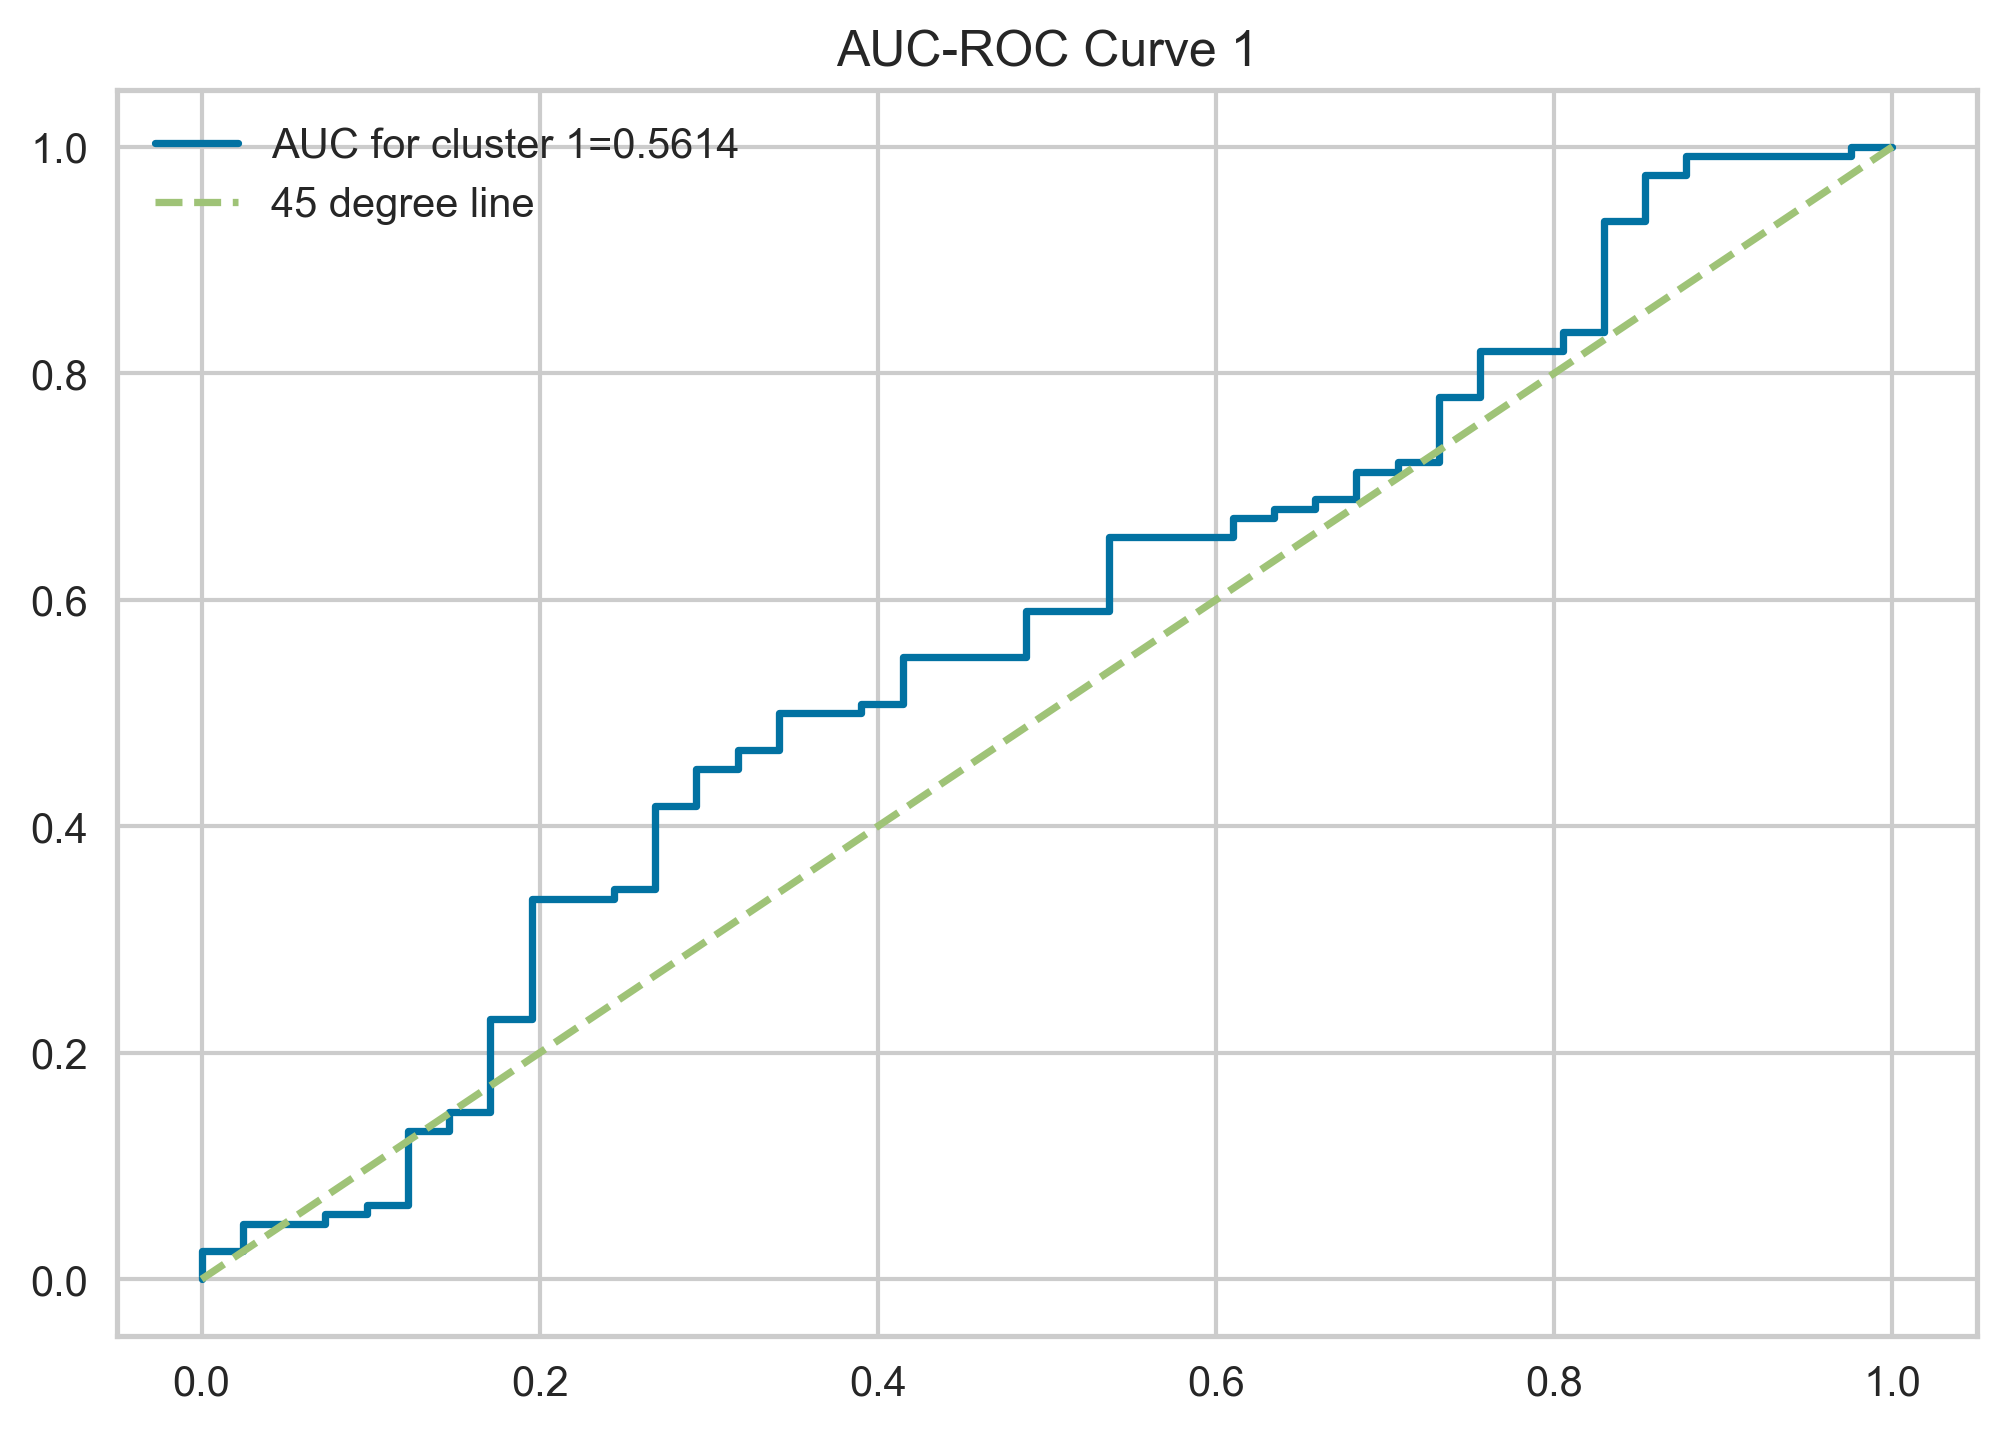

In [41]:
false_pos, true_pos, _ = roc_curve(y_test1.values,  pred_prob1)
auc = roc_auc_score(y_test1, pred_prob1)
plt.plot(false_pos,true_pos, label="AUC for cluster 1={:.4f} "
         .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('AUC-ROC Curve 1')
plt.show()

In [42]:
X_train2 = second_cluster_train
y_train2 = y_train[y_train.Clusters == 1]['Risk']
logit = sm.Logit(y_train2, X_train2)
logit_fit2 = logit.fit()
print(logit_fit2.summary())

Optimization terminated successfully.
         Current function value: 0.688152
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                   Risk   No. Observations:                  199
Model:                          Logit   Df Residuals:                      195
Method:                           MLE   Df Model:                            3
Date:                Tue, 05 Jul 2022   Pseudo R-squ.:              -0.0008478
Time:                        20:26:54   Log-Likelihood:                -136.94
converged:                       True   LL-Null:                       -136.83
Covariance Type:            nonrobust   LLR p-value:                     1.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               0.0281      0.146      0.192      0.848      -0.259       0.315
Job               0.

In [43]:
X_test2 = second_cluster_test
y_test2 = y_test[y_test.Clusters == 1]['Risk']
pred_prob2 = logit_fit2.predict(X_test2)

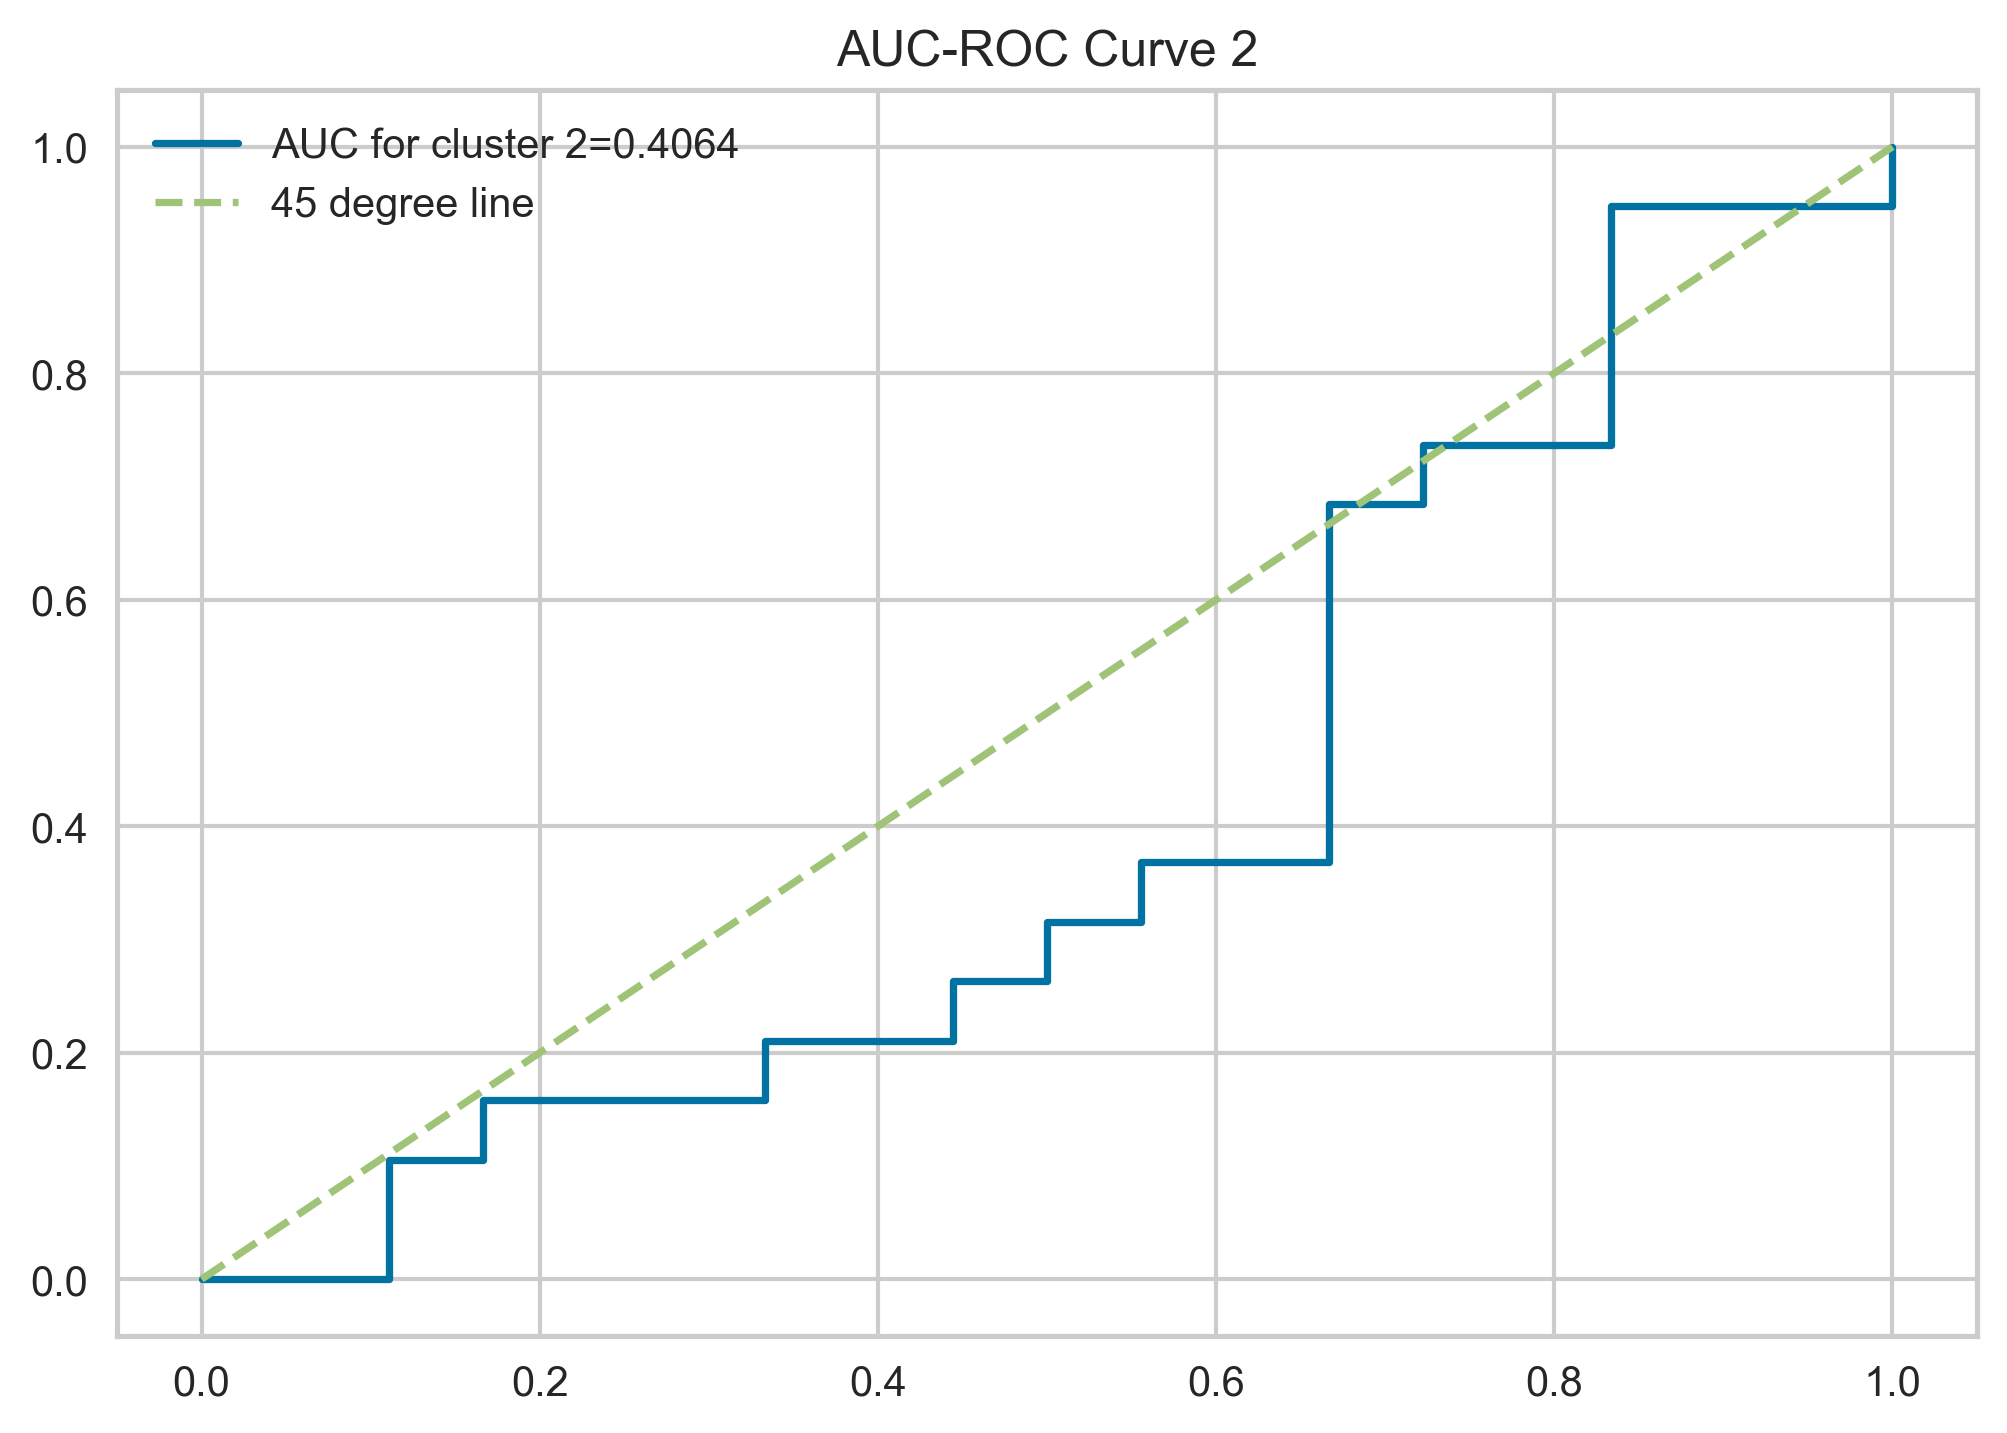

In [44]:
false_pos, true_pos, _ = roc_curve(y_test2.values,  pred_prob2)
auc = roc_auc_score(y_test2, pred_prob2)
plt.plot(false_pos,true_pos,label="AUC for cluster 2={:.4f} "
         .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('AUC-ROC Curve 2')
plt.show()

## Support Vector Classification for PD Estimation

In [50]:
from sklearn.svm import SVC
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
import time

In [51]:
param_svc = {'gamma': [1e-6, 1e-2],
             'C':[0.001,.09,1,5,10],
             'kernel':('linear','rbf')}

In [52]:
svc = SVC(class_weight='balanced')
halve_SVC = HalvingRandomSearchCV(svc, param_svc, 
                                  scoring = 'roc_auc', n_jobs=-1)
halve_SVC.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in SVC {} with {}'.
      format(halve_SVC.best_score_, halve_SVC.best_params_))

Best hyperparameters for first cluster in SVC 0.8366776908353275 with {'kernel': 'rbf', 'gamma': 0.01, 'C': 0.09}


In [53]:
y_pred_SVC1 = halve_SVC.predict(X_test1)
print('The ROC AUC score of SVC for first cluster is {:.4f}'.
      format(roc_auc_score(y_test1, y_pred_SVC1)))

The ROC AUC score of SVC for first cluster is 0.4769


In [54]:
halve_SVC.fit(X_train2, y_train2)
print('Best hyperparameters for second cluster in SVC {} with {}'.
      format(halve_SVC.best_score_, halve_SVC.best_params_))

Best hyperparameters for second cluster in SVC 0.5610416666666667 with {'kernel': 'rbf', 'gamma': 1e-06, 'C': 1}


In [55]:
y_pred_SVC2 = halve_SVC.predict(X_test2)
print('The ROC AUC score of SVC for first cluster is {:.4f}'.
      format(roc_auc_score(y_test2, y_pred_SVC2)))

The ROC AUC score of SVC for first cluster is 0.5000


## Random Forest for PD Estimation

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc = RandomForestClassifier(random_state=42)

In [60]:
param_rfc = {'n_estimators': [100, 300],
    'criterion' :['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 4, 5, 6],
    'min_samples_split':[5, 10]}

In [61]:
halve_RF = HalvingRandomSearchCV(rfc, param_rfc,
                                 scoring = 'roc_auc', n_jobs=-1)
halve_RF.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in RF {} with {}'.
      format(halve_RF.best_score_, halve_RF.best_params_))

Best hyperparameters for first cluster in RF 0.9130189188160202 with {'n_estimators': 100, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6, 'criterion': 'entropy'}


In [62]:
y_pred_RF1 = halve_RF.predict(X_test1)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test1, y_pred_RF1)))

The ROC AUC score of RF for first cluster is 0.5263


In [63]:
halve_RF.fit(X_train2, y_train2)
print('Best hyperparameters for second cluster in RF {} with {}'.
      format(halve_RF.best_score_, halve_RF.best_params_))

Best hyperparameters for second cluster in RF 0.6650498366013072 with {'n_estimators': 300, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'entropy'}


In [64]:
y_pred_RF2 = halve_RF.predict(X_test2)
print('The ROC AUC score of RF for first cluster is {:.4f}'.
      format(roc_auc_score(y_test2, y_pred_RF2)))

The ROC AUC score of RF for first cluster is 0.5877


## Neural Network for PD Estimation

In [65]:
from sklearn.neural_network import MLPClassifier

In [66]:
param_NN = {"hidden_layer_sizes": [(100, 50), (50, 50), (10, 100)],
            "solver": ["lbfgs", "sgd", "adam"], 
            "learning_rate_init": [0.001, 0.05]}

In [67]:
MLP = MLPClassifier(random_state=42)

In [68]:
param_halve_NN = HalvingRandomSearchCV(MLP, param_NN,
                                       scoring = 'roc_auc')
param_halve_NN.fit(X_train1, y_train1)
print('Best hyperparameters for first cluster in NN are {}'.
      format(param_halve_NN.best_params_))

Best hyperparameters for first cluster in NN are {'solver': 'adam', 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100, 50)}


In [69]:
y_pred_NN1 = param_halve_NN.predict(X_test1)
print('The ROC AUC score of NN for first cluster is {:.4f}'.
      format(roc_auc_score(y_test1, y_pred_NN1)))

The ROC AUC score of NN for first cluster is 0.5750


In [70]:
param_halve_NN.fit(X_train2, y_train2)
print('Best hyperparameters for first cluster in NN are {}'.
      format(param_halve_NN.best_params_))

Best hyperparameters for first cluster in NN are {'solver': 'lbfgs', 'learning_rate_init': 0.05, 'hidden_layer_sizes': (50, 50)}


In [71]:
y_pred_NN2 = param_halve_NN.predict(X_test2)
print('The ROC AUC score of NN for first cluster is {:.4f}'.
      format(roc_auc_score(y_test2, y_pred_NN2)))

The ROC AUC score of NN for first cluster is 0.5365


## Deep Learning for PD Estimation

In [72]:
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

In [73]:
def DL_risk(dropout_rate,verbose=0):
    model = keras.Sequential()
    model.add(Dense(128,kernel_initializer='normal', 
        activation = 'relu', input_dim=4))
    model.add(Dense(64, kernel_initializer='normal', 
        activation = 'relu'))
    model.add(Dense(8,kernel_initializer='normal', 
        activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop')
    return model

In [74]:
parameters = {'batch_size':  [10, 50, 100],
          'epochs':  [50, 100, 150],
             'dropout_rate':[0.2, 0.4]}
model = KerasClassifier(build_fn = DL_risk)
gs = GridSearchCV(estimator = model,
                       param_grid = parameters,
                          scoring = 'roc_auc')

In [75]:
gs.fit(X_train1, y_train1, verbose=0)
print('Best hyperparameters for first cluster in DL are {}'.
      format(gs.best_params_))

Best hyperparameters for first cluster in DL are {'batch_size': 10, 'dropout_rate': 0.2, 'epochs': 50}


In [76]:
model = KerasClassifier(build_fn = DL_risk,
                        dropout_rate = gs.best_params_['dropout_rate'],
                        verbose = 0,
                        batch_size = gs.best_params_['batch_size'],
                        epochs = gs.best_params_['epochs'])
model.fit(X_train1, y_train1)
DL_predict1 = model.predict(X_test1)
DL_ROC_AUC = roc_auc_score(y_test1, pd.DataFrame(DL_predict1.flatten()))
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))

DL_ROC_AUC is 0.5506


In [77]:
gs.fit(X_train2.values, y_train2.values, verbose=0)
print('Best parameters for second cluster in DL are {}'.
      format(gs.best_params_))

Best parameters for second cluster in DL are {'batch_size': 10, 'dropout_rate': 0.4, 'epochs': 150}


In [78]:
model = KerasClassifier(build_fn = DL_risk,
                        dropout_rate= gs.best_params_['dropout_rate'],
                        verbose = 0,
                        batch_size = gs.best_params_['batch_size'],
                        epochs = gs.best_params_['epochs'])
model.fit(X_train2, y_train2)
DL_predict2 =  model.predict(X_test2)
DL_ROC_AUC = roc_auc_score(y_test2, DL_predict2.flatten()) 
print('DL_ROC_AUC is {:.4f}'.format(DL_ROC_AUC))

DL_ROC_AUC is 0.6213
